# **Project Setup**

In [ ]:
!pip install geopandas --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 73.3 MB/s eta 0:00:00


In [ ]:
# Google colab
from google.colab import drive
drive.mount('/content/drive')

# Utilities
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.random.seed(42) # For numpy.random

# Datviz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from scipy.stats import probplot
import geopandas as gpd

# Feature engineering
from scipy import stats
from sklearn.impute import SimpleImputer

# Modeling
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

# Models
from statsmodels.tsa.arima.model import ARIMA

Mounted at /content/drive


# **Load Dataset**

In [ ]:
konsumsi_pangan = pd.read_csv("/content/drive/MyDrive/HIMTI-BINUS/data konsumsi pangan.csv")
peternakan = pd.read_csv("/content/drive/MyDrive/HIMTI-BINUS/produksi pangan (peternakan).csv")
pertanian = pd.read_csv("/content/drive/MyDrive/HIMTI-BINUS/produksi pangan (pertanian).csv")
perikanan = pd.read_csv("/content/drive/MyDrive/HIMTI-BINUS/produksi pangan (perikanan).csv")

In [ ]:
# Rata-Rata Konsumsi per Kapita Seminggu Beberapa Macam Bahan Makanan Penting, 2007-2022
# Kapita = orang

# Catatan:
# 1 -- Ikan segar meliputi ikan darat, laut, dan udang
# 2 -- Satu butir telur ayam kampung diperkirakan beratnya sebesar 0,05 kg
# Diolah dari Hasil Survei Sosial Ekonomi Nasional (Susenas) Triwulan I-2013 dan Triwulan I-2014, BPS
# Sumber : Publikasi Statistik Indonesia

# "/" = bermakna dan

konsumsi_pangan.columns = [str(col).replace(".0", "") for col in konsumsi_pangan.iloc[1]]
konsumsi_pangan.drop(index=[0, 1]+list(range(27, 33)), inplace=True) # Clean row
konsumsi_pangan.reset_index(drop=True, inplace=True) # Reset index

konsumsi_pangan

Jenis Bahan Makanan    Satuan   2007   2008   2009   2010  \
0                     Beras lokal/ketan        kg  1.740  1.797  1.755  1.733   
1             Jagung basah dengan kulit        kg  0.046  0.024  0.012  0.018   
2                Jagung pocelan/pipilan        kg  0.060  0.044  0.035  0.030   
3                          Ketela pohon        kg  0.134  0.147  0.106  0.097   
4                         Ketela rambat        kg  0.046  0.051  0.043  0.044   
5                                Gaplek        kg  0.005  0.005  0.001  0.001   
6                Ikan dan udang segar 1        kg  0.260  0.263  0.249  0.271   
7              Ikan dan udang diawetkan       ons  0.523  0.537  0.462  0.451   
8                    Daging sapi/kerbau        kg  0.008  0.007  0.006  0.007   
9               Daging ayam ras/kampung        kg  0.079  0.073  0.069  0.080   
10             Telur ayam ras/kampung 2        kg  0.122  0.115  0.116  0.200   
11               Telur itik/manila/asin     butir  0.093  0.088  0.082  0.077   
12                    Susu kental manis  (397 gr)  0.068  0.061  0.058  0.064   
13                      Susu bubuk bayi        kg  0.026  0.025  0.023  0.023   
14                         Bawang merah       ons  0.578  0.526  0.484  0.485   
15                         Bawang putih       ons  0.291  0.329  0.259  0.260   
16                           Cabe merah       ons  0.282  0.297  0.292  0.293   
17                           Cabe rawit       ons  0.291  0.277  0.247  0.249   
18                       Kacang kedelai        kg  0.002  0.001  0.001  0.001   
19                                 Tahu        kg  0.163  0.137  0.135  0.134   
20                                Tempe        kg  0.153  0.139  0.135  0.133   
21  Minyak kelapa/jagung/goreng lainnya     liter  0.198  0.196  0.189  0.195   
22                               Kelapa     butir  0.216  0.184  0.166  0.159   
23                           Gula pasir       ons  1.654  1.617  1.516  1.475   
24                           Gula merah       ons  0.209  0.188  0.152  0.142   

     2011   2012   2013   2014   2015   2016   2017   2018   2019   2020  \
0   1.721  1.675  1.642  1.626  1.631  1.668  1.565  1.551  1.504  1.505   
1   0.012  0.011  0.011  0.013  0.029  0.035  0.026  0.029  0.039  0.050   
2   0.023  0.029  0.025  0.023  0.023  0.021  0.019  0.019  0.017  0.015   
3   0.111  0.069  0.067  0.066  0.069  0.073  0.122  0.091  0.084  0.093   
4   0.055  0.045  0.045  0.050  0.065  0.069  0.070  0.060  0.061  0.059   
5   0.002  0.002  0.001  0.002  0.004  0.003  0.002  0.002  0.002  0.002   
6   0.282  0.259  0.263  0.274  0.298  0.302  0.326  0.324  0.336  0.333   
7   0.486  0.471  0.431  0.429  0.309  0.301  0.408  0.429  0.425  0.414   
8   0.009  0.007  0.005  0.005  0.008  0.008  0.009  0.009  0.009  0.009   
9   0.083  0.076  0.078  0.086  0.103  0.111  0.124  0.121  0.124  0.130   
10  0.199  0.178  0.169  0.171  1.940  1.983  2.119  2.152  2.137  2.187   
11  0.080  0.068  0.055  0.047  0.041  0.038  0.040  0.039  0.035  0.032   
12  0.063  0.052  0.058  0.059  0.069  0.079  0.089  0.088  0.072  0.070   
13  0.040  0.018  0.025  0.043  0.013  0.013  0.013  0.013  0.013  0.014   
14  0.453  0.530  0.396  0.477  0.520  0.542  0.493  0.529  0.537  0.518   
15  0.259  0.307  0.231  0.300  0.335  0.339  0.313  0.330  0.346  0.320   
16  0.287  0.317  0.273  0.280  0.057  0.044  0.034  0.034  0.038  0.032   
17  0.232  0.269  0.244  0.242  0.057  0.047  0.029  0.035  0.038  0.034   
18  0.001  0.001  0.001      -      -      -  0.001  0.001  0.001  0.001   
19  0.142  0.134  0.135  0.136  0.144  0.151  0.157  0.158  0.152  0.153   
20  0.140  0.136  0.136  0.133  0.134  0.141  0.147  0.146  0.139  0.140   
21  0.195  0.205  0.197  0.205  0.223  0.230  0.221  0.227  0.228  0.233   
22  0.143  0.133  0.117  0.115  0.136  0.126  0.100  0.092  0.090  0.087   
23  1.416  1.242  1.275  1.229  1.305  1.432  1.333  1.309  1.272  1.254   
24  0.139  0.

**Keterangan Data untuk peternakan/pertanian/perikanan:**<br>
**Note:** gk berlaku buat data `konsumsi_pangan`
- ... : Data tidak tersedia
- –	: Tidak ada atau nol
- 0	: Data dapat diabaikan
- NA : Data tidak dapat ditampilkan
- e	: Angka estimasi
- r	: Angka diperbaiki
- x	: Angka sementara
- xx : Angka sangat sementara
- xxx : Angka sangat sangat sementara

In [ ]:
# Produksi Daging Ternak Menurut Provinsi dan Jenis Ternak (kg), 2022

# Penanggung Jawab : Direktorat Jenderal Peternakan & Kesehatan Hewan
# Sumber : Kementerian Pertanian (Direktorat Jenderal Peternakan dan Kesehatan Hewan)

peternakan.columns = [str(col) for col in peternakan.iloc[1]]
peternakan.drop(index=[0, 1]+list(range(37, 57)), inplace=True) # Clean row
peternakan.reset_index(drop=True, inplace=True) # Reset index

peternakan

Provinsi\n Province  Produksi Daging Ternak - Sapi (kg) (kg)  \
0                        Aceh                          12 014 962,50x   
1              Sumatera Utara                          13 859 094,94x   
2              Sumatera Barat                          21 514 656,71x   
3                        Riau                           9 127 690,84x   
4                       Jambi                           5 760 104,96x   
5            Sumatera Selatan                          15 458 871,83x   
6                    Bengkulu                           3 329 266,86x   
7                     Lampung                          21 176 203,43x   
8   Kepulauan Bangka Belitung                           3 395 043,07x   
9              Kepulauan Riau                           1 390 389,85x   
10                DKI Jakarta                          17 617 606,55x   
11                 Jawa Barat                          84 960 622,15x   
12                Jawa Tengah                          61 393 945,00x   
13              DI Yogyakarta                           7 899 896,39x   
14                 Jawa Timur                         110 991 175,73x   
15                     Banten                          17 242 686,78x   
16                       Bali                           4 694 032,72x   
17        Nusa Tenggara Barat                          11 159 006,14x   
18        Nusa Tenggara Timur                           8 680 437,42x   
19           Kalimantan Barat                           5 095 885,63x   
20          Kalimantan Tengah                           4 113 865,47x   
21         Kalimantan Selatan                           7 351 352,86x   
22           Kalimantan Timur                           7 465 561,06x   
23           Kalimantan Utara                             895 569,20x   
24             Sulawesi Utara                           3 169 388,12x   
25            Sulawesi Tengah                           5 967 195,48x   
26           Sulawesi Selatan                          16 277 506,53x   
27          Sulawesi Tenggara                           4 525 615,24x   
28                  Gorontalo                           2 918 750,00x   
29             Sulawesi Barat                           1 725 341,19x   
30                     Maluku                           2 308 116,00x   
31               Maluku Utara                           1 320 506,63x   
32                Papua Barat                           1 506 021,40x   
33                      Papua                           2 616 770,82x   
34                  Indonesia                         498 923 139,50x   

   Produksi Daging Ternak - Kerbau (kg) (kg)  \
0                              2 774 437,50x   
1                              2 260 407,82x   
2                              1 980 639,25x   
3                              2 008 639,76x   
4                              1 783 840,44x   
5                                702 287,87x   
6                                313 996,80x   
7                                184 058,32x   
8                                          –   
9                                          –   
10                                26 953,82x   
11                             1 655 136,50x   
12                             1 510 268,00x   
13                                 1 680,00x   
14                                71 648,31x   
15                             1 283 747,13x   
16                                19 224,58x   
17                               838 418,12x   
18                             1 232 632,98x   
19                                33 780,00x   
20                                70 575,50x   
21                               396 701,47x   
22                                64 562,20x   
23                                10 302,49x   
24                                         –   
25                                20 711,25x   
26                             1 499 507,20x   
27                                32

In [ ]:
# Produksi Padi (1) dan Beras Menurut Provinsi, 2022

# Penanggung Jawab : Subdirektorat Statistik Tanaman Pangan
# Catatan:
# (1) -- Kualitas produksi gabah kering giling (GKG) / The production is in term of dry unhusked paddy
# 2 -- Produksi September–Desember 2022 dihitung berdasarkan rata-rata produktivitas September–Desember 2018-2021,
#        luas panen realisasi September 2022, dan angka potensi luas panen Oktober-Desember 2022
# Sumber :	BPS, Survei Kerangka Sampel Area (KSA) & Survei Ubinan

pertanian.columns = [str(col) for col in pertanian.iloc[1]]
pertanian.drop(index=[0, 1]+list(range(37, 57)), inplace=True) # Clean row
pertanian.reset_index(drop=True, inplace=True) # Reset index

pertanian

Provinsi\n Province  Produksi Padi - Produksi Padi (ton) (ton)  \
0                        Aceh                             1 533 138,08x   
1              Sumatera Utara                             2 131 672,38x   
2              Sumatera Barat                             1 422 873,77x   
3                        Riau                               227 346,32x   
4                       Jambi                               289 276,78x   
5            Sumatera Selatan                             2 759 342,64x   
6                    Bengkulu                               290 155,93x   
7                     Lampung                             2 661 362,81x   
8   Kepulauan Bangka Belitung                                62 641,49x   
9              Kepulauan Riau                                   589,68x   
10                DKI Jakarta                                 2 741,38x   
11                 Jawa Barat                             9 620 534,23x   
12                Jawa Tengah                             9 579 069,09x   
13              DI Yogyakarta                               580 685,98x   
14                 Jawa Timur                             9 686 760,38x   
15                     Banten                             1 776 812,05x   
16                       Bali                               691 818,87x   
17        Nusa Tenggara Barat                             1 456 922,74x   
18        Nusa Tenggara Timur                               776 867,06x   
19           Kalimantan Barat                               814 743,34x   
20          Kalimantan Tengah                               353 864,63x   
21         Kalimantan Selatan                               873 130,27x   
22           Kalimantan Timur                               232 143,49x   
23           Kalimantan Utara                                37 966,25x   
24             Sulawesi Utara                               253 478,94x   
25            Sulawesi Tengah                               771 524,90x   
26           Sulawesi Selatan                             5 341 020,84x   
27          Sulawesi Tenggara                               494 855,89x   
28                  Gorontalo                               249 708,92x   
29             Sulawesi Barat                               364 683,16x   
30                     Maluku                                92 640,14x   
31               Maluku Utara                                24 705,38x   
32                Papua Barat                                24 031,60x   
33                      Papua                               191 109,24x   
34                  Indonesia                            55 670 218,65x   

   Produksi Padi - Produksi Beras (ton) (ton)  
0                                 883 214,61x  
1                               1 222 762,05x  
2                                 823 876,28x  
3                                 130 475,02x  
4                                 167 338,97x  
5                               1 584 566,62x  
6                                 167 119,51x  
7                               1 529 891,90x  
8                                  37 129,55x  
9                                     337,44x  
10                                  1 615,91x  
11                              5 555 686,45x  
12                              5 508 531,25x  
13                                329 844,29x  
14                              5 593 330,44x  
15                              1 011 949,38x  
16                                390 155,20x  
17                                829 790,15x  
18                                455 035,11x  
19                                481 995,22x  
20                                210 199,80x  
21                                516 611,76x  
22                                135 030,52x  
23                                 22 507,84x  
24                                142 438,39x  
25                                455 414,85x  
26          

In [ ]:
# Produksi dan Nilai Produksi Perikanan Tangkap di Perairan Umum Menurut Provinsi dan Lokasi, 2021

# Penanggung Jawab : Kementerian Kelautan dan Perikanan
# Catatan :	Angka Tetap
# Sumber : Database Validasi Nasional Satu Data KP

perikanan.columns = [str(col) for col in perikanan.iloc[1]]
perikanan.drop(index=[0, 1]+list(range(37, 56)), inplace=True) # Clean row
perikanan.reset_index(drop=True, inplace=True) # Reset index

perikanan

Provinsi\n Province   \
0                        Aceh   
1              Sumatera Utara   
2              Sumatera Barat   
3                        Riau   
4                       Jambi   
5            Sumatera Selatan   
6                    Bengkulu   
7                     Lampung   
8   Kepulauan Bangka Belitung   
9              Kepulauan Riau   
10                DKI Jakarta   
11                 Jawa Barat   
12                Jawa Tengah   
13              DI Yogyakarta   
14                 Jawa Timur   
15                     Banten   
16                       Bali   
17        Nusa Tenggara Barat   
18        Nusa Tenggara Timur   
19           Kalimantan Barat   
20          Kalimantan Tengah   
21         Kalimantan Selatan   
22           Kalimantan Timur   
23           Kalimantan Utara   
24             Sulawesi Utara   
25            Sulawesi Tengah   
26           Sulawesi Selatan   
27          Sulawesi Tenggara   
28                  Gorontalo   
29             Sulawesi Barat   
30                     Maluku   
31               Maluku Utara   
32                Papua Barat   
33                      Papua   
34                  Indonesia   

   Produksi Perikanan Tangkap di Perairan Umum - Lokasi di Waduk (ton) (ton)  \
0                                                  28                          
1                                                   –                          
2                                               1 986                          
3                                                 774                          
4                                                   –                          
5                                                   –                          
6                                                  82                          
7                                                 688                          
8                                                   –                          
9                                                   –                          
10                                                  –                          
11                                              6 434                          
12                                             10 731                          
13                                                200                          
14                                              2 530                          
15                                                  –                          
16                                                 43                          
17                                              3 192                          
18                                                  –                          
19                                                  –                          
20                                                  –                          
21                                                 92                          
22                                                  –                          
23                                                  –                          
24                                                  –                          
25                                                  –                          
26                                                396                          
27                                                  –                          
28                                                  –                          
29                                                  –                          
30                                                  –                          
31                                                  –                          
32                                                  –                          
33                                                  –                          
34                  

# **I. Data Wrangling**

### **1. Row and Column Cleaning**

In [ ]:
# Membersihkan "indikator catatan"
konsumsi_pangan.loc[6, "Jenis Bahan Makanan"] = "Ikan dan udang segar"
konsumsi_pangan.loc[10, "Jenis Bahan Makanan"] = "Telur ayam ras/kampung"

In [ ]:
peternakan.columns = ["Provinsi", "Produksi Daging Sapi (kg)", "Produksi Daging Kerbau (kg)", "Produksi Daging Kuda (kg)",
                      "Produksi Daging Kambing (kg)", "Produksi Daging Domba (kg)", "Produksi Daging Babi (kg)"]

# Nanti "ton" dikonversi jadi "kg"
pertanian.columns = ["ProvinsiDup1", "Produksi GKG (kg)", "Produksi Beras (kg)"]

# PT = Perikanan Tangkap
# Nanti "ton" dikonversi jadi "kg"
perikanan.columns = ["ProvinsiDup2", "Produksi PT di Waduk (kg)", "Nilai Produksi PT di Waduk (ribu rupiah)",
                     "Produksi PT di Sungai (kg)", "Nilai Produksi PT di Sungai (ribu rupiah)",
                     "Produksi PT di Danau (kg)", "Nilai Produksi PT di Danau (ribu rupiah)",
                     "Produksi PT di Rawa (kg)", "Nilai Produksi PT di Rawa (ribu rupiah)",
                     "Produksi PT di Genangan Air (kg)", "Nilai Produksi PT di Genangan Air (ribu rupiah)"]

In [ ]:
# Gabungkan data produksi pangan
produksi_pangan = pd.concat([peternakan, pertanian, perikanan], axis=1).drop(["ProvinsiDup1", "ProvinsiDup2"], axis=1)
produksi_pangan.head()

Provinsi Produksi Daging Sapi (kg) Produksi Daging Kerbau (kg)  \
0            Aceh            12 014 962,50x               2 774 437,50x   
1  Sumatera Utara            13 859 094,94x               2 260 407,82x   
2  Sumatera Barat            21 514 656,71x               1 980 639,25x   
3            Riau             9 127 690,84x               2 008 639,76x   
4           Jambi             5 760 104,96x               1 783 840,44x   

  Produksi Daging Kuda (kg) Produksi Daging Kambing (kg)  \
0                         –                2 046 425,00x   
1                39 206,25x                  927 472,09x   
2                 2 700,00x                  405 304,45x   
3                         –                  748 804,10x   
4                   147,00x                  653 482,75x   

  Produksi Daging Domba (kg) Produksi Daging Babi (kg) Produksi GKG (kg)  \
0                453 462,50x                61 032,40x     1 533 138,08x   
1                588 720,75x            10 331 494,23x     2 131 672,38x   
2                 21 236,81x               370 897,67x     1 422 873,77x   
3                 23 253,30x               899 081,99x       227 346,32x   
4                118 576,23x               156 458,41x       289 276,78x   

  Produksi Beras (kg) Produksi PT di Waduk (kg)  \
0         883 214,61x                        28   
1       1 222 762,05x                         –   
2         823 876,28x                     1 986   
3         130 475,02x                       774   
4         167 338,97x                         –   

  Nilai Produksi PT di Waduk (ribu rupiah) Produksi PT di Sungai (kg)  \
0                                  706 083                     16 778   
1                                        –                      5 219   
2                               82 733 600                      4 265   
3                               33 637 227                     21 768   
4                                        –                      5 262   

  Nilai Produksi PT di Sungai (ribu rupiah) Produksi PT di Danau (kg)  \
0                               667 318 500                       553   
1                               217 846 971                     6 274   
2                               152 102 593                     2 984   
3                               873 567 281                       683   
4                               158 613 626                     2 849   

  Nilai Produksi PT di Danau (ribu rupiah) Produksi PT di Rawa (kg)  \
0                               15 285 231                      118   
1                              197 776 695                      402   
2                              105 093 083                       13   
3                               31 494 435                      999   
4                               87 490 093                      276   

  Nilai Produksi PT di Rawa (ribu rupiah) Produksi PT di Genangan Air (kg)  \
0                               4 141 652                               37   
1                              16 131 714                               39   
2                                 433 300                              441   
3                              30 641 340                              175   
4                               7 032 361                              129   

  Nilai Produksi PT di Genangan Air (ribu rupiah)  
0                                       1 126 880  
1                                       1 068 410  
2                                      22 097 839  
3                                       6 963 165  
4                                       3 917 911

**Note Penting:** for now merge dulu jadi `produksi_pangan` meskipun data `Perikanan` itu 2021.<br>
Tapi di data `Perikanan` ada keterangan "Tabel dibuat : 2023-01-12 11:21:19" (bisa jadi dia data 2022)

### **2. Data Inspection**

In [ ]:
print("Row & Column data konsumsi_pangan:", konsumsi_pangan.shape)
print("Row & Column data produksi_pangan:", produksi_pangan.shape)

Row & Column data konsumsi_pangan: (25, 18)
Row & Column data produksi_pangan: (35, 19)


In [ ]:
konsumsi_pangan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Jenis Bahan Makanan  25 non-null     object 
 1   Satuan               25 non-null     object 
 2   2007                 25 non-null     float64
 3   2008                 25 non-null     float64
 4   2009                 25 non-null     float64
 5   2010                 25 non-null     float64
 6   2011                 25 non-null     float64
 7   2012                 25 non-null     float64
 8   2013                 25 non-null     float64
 9   2014                 25 non-null     object 
 10  2015                 25 non-null     object 
 11  2016                 25 non-null     object 
 12  2017                 25 non-null     float64
 13  2018                 25 non-null     float64
 14  2019                 25 non-null     float64
 15  2020                 25 non-null     float

In [ ]:
produksi_pangan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 19 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Provinsi                                         35 non-null     object
 1   Produksi Daging Sapi (kg)                        35 non-null     object
 2   Produksi Daging Kerbau (kg)                      35 non-null     object
 3   Produksi Daging Kuda (kg)                        35 non-null     object
 4   Produksi Daging Kambing (kg)                     35 non-null     object
 5   Produksi Daging Domba (kg)                       35 non-null     object
 6   Produksi Daging Babi (kg)                        35 non-null     object
 7   Produksi GKG (kg)                                35 non-null     object
 8   Produksi Beras (kg)                              35 non-null     object
 9   Produksi PT di Waduk (kg)                    

### **3. Handling Issues**

In [ ]:
# Anggap "-" : nol (?), maka impute 0
konsumsi_pangan.replace("-", 0, inplace=True)

# Karena "–" : Tidak ada / nol (?), maka impute 0
produksi_pangan.replace("–", 0, inplace=True)

In [ ]:
print("Duplikat konsumsi_pangan:", konsumsi_pangan.duplicated().sum())
print("Duplikat produksi_pangan:", produksi_pangan.duplicated().sum())

Duplikat konsumsi_pangan: 0
Duplikat produksi_pangan: 0


In [ ]:
# Data format cleaning
konsumsi_pangan[konsumsi_pangan.columns[2:]] = konsumsi_pangan.loc[:, konsumsi_pangan.columns[2:]].astype("float")
konsumsi_pangan.head()

Jenis Bahan Makanan Satuan   2007   2008   2009   2010   2011   2012  \
0          Beras lokal/ketan     kg  1.740  1.797  1.755  1.733  1.721  1.675   
1  Jagung basah dengan kulit     kg  0.046  0.024  0.012  0.018  0.012  0.011   
2     Jagung pocelan/pipilan     kg  0.060  0.044  0.035  0.030  0.023  0.029   
3               Ketela pohon     kg  0.134  0.147  0.106  0.097  0.111  0.069   
4              Ketela rambat     kg  0.046  0.051  0.043  0.044  0.055  0.045   

    2013   2014   2015   2016   2017   2018   2019   2020   2021   2022  
0  1.642  1.626  1.631  1.668  1.565  1.551  1.504  1.505  1.569  1.560  
1  0.011  0.013  0.029  0.035  0.026  0.029  0.039  0.050  0.034  0.032  
2  0.025  0.023  0.023  0.021  0.019  0.019  0.017  0.015  0.016  0.014  
3  0.067  0.066  0.069  0.073  0.122  0.091  0.084  0.093  0.119  0.106  
4  0.045  0.050  0.065  0.069  0.070  0.060  0.061  0.059  0.071  0.065

In [ ]:
tahun_cols = ["2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014",
              "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

# Konversikan "ons" ke "kg" -- kali 0.1
konsumsi_pangan.loc[konsumsi_pangan["Satuan"] == "ons", tahun_cols] = konsumsi_pangan.loc[konsumsi_pangan["Satuan"] == "ons", tahun_cols] * 0.1
konsumsi_pangan.loc[~konsumsi_pangan["Satuan"].isin(["butir", "liter", "(397 gr)"]), "Satuan"] = "kg"

In [ ]:
# Membersihkan x : Angka sementara (?)
produksi_pangan = produksi_pangan.applymap(lambda x: x.strip("x") if isinstance(x, str) else x)
produksi_pangan.head()

Provinsi Produksi Daging Sapi (kg) Produksi Daging Kerbau (kg)  \
0            Aceh             12 014 962,50                2 774 437,50   
1  Sumatera Utara             13 859 094,94                2 260 407,82   
2  Sumatera Barat             21 514 656,71                1 980 639,25   
3            Riau              9 127 690,84                2 008 639,76   
4           Jambi              5 760 104,96                1 783 840,44   

  Produksi Daging Kuda (kg) Produksi Daging Kambing (kg)  \
0                         0                 2 046 425,00   
1                 39 206,25                   927 472,09   
2                  2 700,00                   405 304,45   
3                         0                   748 804,10   
4                    147,00                   653 482,75   

  Produksi Daging Domba (kg) Produksi Daging Babi (kg) Produksi GKG (kg)  \
0                 453 462,50                 61 032,40      1 533 138,08   
1                 588 720,75             10 331 494,23      2 131 672,38   
2                  21 236,81                370 897,67      1 422 873,77   
3                  23 253,30                899 081,99        227 346,32   
4                 118 576,23                156 458,41        289 276,78   

  Produksi Beras (kg) Produksi PT di Waduk (kg)  \
0          883 214,61                        28   
1        1 222 762,05                         0   
2          823 876,28                     1 986   
3          130 475,02                       774   
4          167 338,97                         0   

  Nilai Produksi PT di Waduk (ribu rupiah) Produksi PT di Sungai (kg)  \
0                                  706 083                     16 778   
1                                        0                      5 219   
2                               82 733 600                      4 265   
3                               33 637 227                     21 768   
4                                        0                      5 262   

  Nilai Produksi PT di Sungai (ribu rupiah) Produksi PT di Danau (kg)  \
0                               667 318 500                       553   
1                               217 846 971                     6 274   
2                               152 102 593                     2 984   
3                               873 567 281                       683   
4                               158 613 626                     2 849   

  Nilai Produksi PT di Danau (ribu rupiah) Produksi PT di Rawa (kg)  \
0                               15 285 231                      118   
1                              197 776 695                      402   
2                              105 093 083                       13   
3                               31 494 435                      999   
4                               87 490 093                      276   

  Nilai Produksi PT di Rawa (ribu rupiah) Produksi PT di Genangan Air (kg)  \
0                               4 141 652                               37   
1                              16 131 714                               39   
2                                 433 300                              441   
3                              30 641 340                              175   
4                               7 032 361                              129   

  Nilai Produksi PT di Genangan Air (ribu rupiah)  
0                                       1 126 880  
1                                       1 068 410  
2                                      22 097 839  
3                                       6 963 165  
4                                       3 917 911

In [ ]:
# Perbaiki jadi format numerik berupa float64
produksi_pangan = produksi_pangan.applymap(lambda x: x.replace(" ", "").replace(",", ".") if isinstance(x, str) else x)
produksi_pangan[produksi_pangan.columns[1:]] = produksi_pangan.loc[:, produksi_pangan.columns[1:]].astype("float")

In [ ]:
# Konversi pangan dari "ton" ke "kg" (kali 1000)
produksi_pangan.iloc[:, [7, 8]] = produksi_pangan.iloc[:, [7, 8]] * 1000 # Pertanian
produksi_pangan.iloc[:, list(range(9, 19, 2))] = produksi_pangan.iloc[:, list(range(9, 19, 2))] * 1000 # Produksi Perikanan

# Konversi Nilai produksi (ribu) menjadi "satuan"
produksi_pangan.iloc[:, list(range(10, 19, 2))] = produksi_pangan.iloc[:, list(range(10, 19, 2))] * 1000 # Nilai Produksi Perikanan

produksi_pangan.head()

Provinsi  Produksi Daging Sapi (kg)  Produksi Daging Kerbau (kg)  \
0           Aceh                12014962.50                   2774437.50   
1  SumateraUtara                13859094.94                   2260407.82   
2  SumateraBarat                21514656.71                   1980639.25   
3           Riau                 9127690.84                   2008639.76   
4          Jambi                 5760104.96                   1783840.44   

   Produksi Daging Kuda (kg)  Produksi Daging Kambing (kg)  \
0                       0.00                    2046425.00   
1                   39206.25                     927472.09   
2                    2700.00                     405304.45   
3                       0.00                     748804.10   
4                     147.00                     653482.75   

   Produksi Daging Domba (kg)  Produksi Daging Babi (kg)  Produksi GKG (kg)  \
0                   453462.50                   61032.40       1.533138e+09   
1                   588720.75                10331494.23       2.131672e+09   
2                    21236.81                  370897.67       1.422874e+09   
3                    23253.30                  899081.99       2.273463e+08   
4                   118576.23                  156458.41       2.892768e+08   

   Produksi Beras (kg)  Produksi PT di Waduk (kg)  \
0         8.832146e+08                    28000.0   
1         1.222762e+09                        0.0   
2         8.238763e+08                  1986000.0   
3         1.304750e+08                   774000.0   
4         1.673390e+08                        0.0   

   Nilai Produksi PT di Waduk (ribu rupiah)  Produksi PT di Sungai (kg)  \
0                              7.060830e+08                  16778000.0   
1                              0.000000e+00                   5219000.0   
2                              8.273360e+10                   4265000.0   
3                              3.363723e+10                  21768000.0   
4                              0.000000e+00                   5262000.0   

   Nilai Produksi PT di Sungai (ribu rupiah)  Produksi PT di Danau (kg)  \
0                               6.673185e+11                   553000.0   
1                               2.178470e+11                  6274000.0   
2                               1.521026e+11                  2984000.0   
3                               8.735673e+11                   683000.0   
4                               1.586136e+11                  2849000.0   

   Nilai Produksi PT di Danau (ribu rupiah)  Produksi PT di Rawa (kg)  \
0                              1.528523e+10                  118000.0   
1                              1.977767e+11                  402000.0   
2                              1.050931e+11                   13000.0   
3                              3.149444e+10                  999000.0   
4                              8.749009e+10                  276000.0   

   Nilai Produksi PT di Rawa (ribu rupiah)  Produksi PT di Genangan Air (kg)  \
0                             4.141652e+09                           37000.0   
1                             1.613171e+10                           39000.0   
2                             4.333000e+08                          441000.0   
3                             3.064134e+10                          175000.0   
4                             7.032361e+09                          129000.0   

   Nilai Produksi PT di Genangan Air (ribu rupiah)  
0                                     1.126880e+09  
1                                     1.068410e+09  
2                                     2.209784e+10  
3                                     6.963165e+09  
4                                     3.917911e+09

In [ ]:
# Row "Indonesia" tidak ikut
mean_pangan = produksi_pangan.drop(34, axis=0).describe().iloc[1]
pd.DataFrame(mean_pangan).T

Produksi Daging Sapi (kg)  Produksi Daging Kerbau (kg)  \
mean               1.467421e+07                621180.898824   

      Produksi Daging Kuda (kg)  Produksi Daging Kambing (kg)  \
mean               39347.790588                  1.872307e+06   

      Produksi Daging Domba (kg)  Produksi Daging Babi (kg)  \
mean                1.607368e+06               7.728329e+06   

      Produksi GKG (kg)  Produksi Beras (kg)  Produksi PT di Waduk (kg)  \
mean       1.637359e+09         9.433543e+08              799294.117647   

      Nilai Produksi PT di Waduk (ribu rupiah)  Produksi PT di Sungai (kg)  \
mean                              1.683464e+10                7.208824e+06   

      Nilai Produksi PT di Sungai (ribu rupiah)  Produksi PT di Danau (kg)  \
mean                               2.606066e+11               2.736059e+06   

      Nilai Produksi PT di Danau (ribu rupiah)  Produksi PT di Rawa (kg)  \
mean                              8.234597e+10              2.527647e+06   

      Nilai Produksi PT di Rawa (ribu rupiah)  \
mean                             8.520459e+10   

      Produksi PT di Genangan Air (kg)  \
mean                     167794.117647   

      Nilai Produksi PT di Genangan Air (ribu rupiah)  
mean                                     4.305092e+09

In [ ]:
# Cek apakah produksi suatu provinsi dibawah rata" untuk semua sektor
temp_df = produksi_pangan[produksi_pangan.drop(["Provinsi"], axis=1) < mean_pangan].fillna("A.A.") # "Above Average" / Dibawah rata"
temp_df["Provinsi"] = produksi_pangan["Provinsi"]
temp_df.drop(34, axis=0, inplace=True) # "Indonesia" tidak ikut
temp_df.head()

Provinsi Produksi Daging Sapi (kg) Produksi Daging Kerbau (kg)  \
0           Aceh                12014962.5                        A.A.   
1  SumateraUtara               13859094.94                        A.A.   
2  SumateraBarat                      A.A.                        A.A.   
3           Riau                9127690.84                        A.A.   
4          Jambi                5760104.96                        A.A.   

  Produksi Daging Kuda (kg) Produksi Daging Kambing (kg)  \
0                       0.0                         A.A.   
1                  39206.25                    927472.09   
2                    2700.0                    405304.45   
3                       0.0                     748804.1   
4                     147.0                    653482.75   

  Produksi Daging Domba (kg) Produksi Daging Babi (kg) Produksi GKG (kg)  \
0                   453462.5                   61032.4      1533138080.0   
1                  588720.75                      A.A.              A.A.   
2                   21236.81                 370897.67      1422873770.0   
3                    23253.3                 899081.99       227346320.0   
4                  118576.23                 156458.41       289276780.0   

  Produksi Beras (kg) Produksi PT di Waduk (kg)  \
0         883214610.0                   28000.0   
1                A.A.                       0.0   
2         823876280.0                      A.A.   
3         130475020.0                  774000.0   
4         167338970.0                       0.0   

  Nilai Produksi PT di Waduk (ribu rupiah) Produksi PT di Sungai (kg)  \
0                              706083000.0                       A.A.   
1                                      0.0                  5219000.0   
2                                     A.A.                  4265000.0   
3                                     A.A.                       A.A.   
4                                      0.0                  5262000.0   

  Nilai Produksi PT di Sungai (ribu rupiah) Produksi PT di Danau (kg)  \
0                                      A.A.                  553000.0   
1                            217846971000.0                      A.A.   
2                            152102593000.0                      A.A.   
3                                      A.A.                  683000.0   
4                            158613626000.0                      A.A.   

  Nilai Produksi PT di Danau (ribu rupiah) Produksi PT di Rawa (kg)  \
0                            15285231000.0                 118000.0   
1                                     A.A.                 402000.0   
2                                     A.A.                  13000.0   
3                            31494435000.0                 999000.0   
4                                     A.A.                 276000.0   

  Nilai Produksi PT di Rawa (ribu rupiah) Produksi PT di Genangan Air (kg)  \
0                            4141652000.0                          37000.0   
1                           16131714000.0                          39000.0   
2                             433300000.0                             A.A.   
3                           30641340000.0                             A.A.   
4                            7032361000.0                         129000.0   

  Nilai Produksi PT di Genangan Air (ribu rupiah)  
0                                    1126880000.0  
1                                    1068410000.0  
2                                            A.A.  
3                                            A.A.  
4                                    3917911000.0

In [ ]:
for col in temp_df.columns[1:]:
    provinsi_list_below = []
    provinsi_list_above = []
    for index, row in temp_df.iterrows():
        if row[col] != "A.A.":
            provinsi_list_below.append(row["Provinsi"])
        else:
            provinsi_list_above.append(row["Provinsi"])

    print(f"Provinsi dengan {col} yang dibawah Rata-rata:\n{np.array(provinsi_list_below)} -- {len(provinsi_list_below)}")
    print(f"======================================================================================")
    print(f"DIATAS Rata-rata: {np.array(provinsi_list_above)} -- {len(provinsi_list_above)}\n")

Provinsi dengan Produksi Daging Sapi (kg) yang dibawah Rata-rata:
['Aceh' 'SumateraUtara' 'Riau' 'Jambi' 'Bengkulu'
 'KepulauanBangkaBelitung' 'KepulauanRiau' 'DIYogyakarta' 'Bali'
 'NusaTenggaraBarat' 'NusaTenggaraTimur' 'KalimantanBarat'
 'KalimantanTengah' 'KalimantanSelatan' 'KalimantanTimur'
 'KalimantanUtara' 'SulawesiUtara' 'SulawesiTengah' 'SulawesiTenggara'
 'Gorontalo' 'SulawesiBarat' 'Maluku' 'MalukuUtara' 'PapuaBarat' 'Papua'] -- 25
DIATAS Rata-rata: ['SumateraBarat' 'SumateraSelatan' 'Lampung' 'DKIJakarta' 'JawaBarat'
 'JawaTengah' 'JawaTimur' 'Banten' 'SulawesiSelatan'] -- 9

Provinsi dengan Produksi Daging Kerbau (kg) yang dibawah Rata-rata:
['Bengkulu' 'Lampung' 'KepulauanBangkaBelitung' 'KepulauanRiau'
 'DKIJakarta' 'DIYogyakarta' 'JawaTimur' 'Bali' 'KalimantanBarat'
 'KalimantanTengah' 'KalimantanSelatan' 'KalimantanTimur'
 'KalimantanUtara' 'SulawesiUtara' 'SulawesiTengah' 'SulawesiTenggara'
 'Gorontalo' 'SulawesiBarat' 'Maluku' 'MalukuUtara' 'PapuaBarat' 'Papua'] --

# **II. EDA**

### **2.1 Univariate Exploration**

Pangan yang bisa dibandingkan karena ada di `konsumsi_pangan` dan `produksi_pangan`:
- Beras lokal/ketan (0)
- Ikan dan udang segar (6)
- Ikan dan udang diawetkan (7)
- Daging sapi/kerbau (8)

**Note:** PT "Segar" dan "Diawetkan" dapat digabung

In [ ]:
produksi_pangan.iloc[-1]

Provinsi                                                 Indonesia
Produksi Daging Sapi (kg)                              498923139.5
Produksi Daging Kerbau (kg)                            21120150.56
Produksi Daging Kuda (kg)                               1337824.88
Produksi Daging Kambing (kg)                           63658427.18
Produksi Daging Domba (kg)                             54650527.28
Produksi Daging Babi (kg)                             262763173.37
Produksi GKG (kg)                                    55670218650.0
Produksi Beras (kg)                                  32074045460.0
Produksi PT di Waduk (kg)                               27176000.0
Nilai Produksi PT di Waduk (ribu rupiah)            572377682000.0
Produksi PT di Sungai (kg)                             245100000.0
Nilai Produksi PT di Sungai (ribu rupiah)          8860623974000.0
Produksi PT di Danau (kg)                               93026000.0
Nilai Produksi PT di Danau (ribu rupiah)           27997629690

### **2.2 Bivariate Exploration**

In [ ]:
konsumsi_pangan.head()

Jenis Bahan Makanan Satuan   2007   2008   2009   2010   2011   2012  \
0          Beras lokal/ketan     kg  1.740  1.797  1.755  1.733  1.721  1.675   
1  Jagung basah dengan kulit     kg  0.046  0.024  0.012  0.018  0.012  0.011   
2     Jagung pocelan/pipilan     kg  0.060  0.044  0.035  0.030  0.023  0.029   
3               Ketela pohon     kg  0.134  0.147  0.106  0.097  0.111  0.069   
4              Ketela rambat     kg  0.046  0.051  0.043  0.044  0.055  0.045   

    2013   2014   2015   2016   2017   2018   2019   2020   2021   2022  
0  1.642  1.626  1.631  1.668  1.565  1.551  1.504  1.505  1.569  1.560  
1  0.011  0.013  0.029  0.035  0.026  0.029  0.039  0.050  0.034  0.032  
2  0.025  0.023  0.023  0.021  0.019  0.019  0.017  0.015  0.016  0.014  
3  0.067  0.066  0.069  0.073  0.122  0.091  0.084  0.093  0.119  0.106  
4  0.045  0.050  0.065  0.069  0.070  0.060  0.061  0.059  0.071  0.065

In [ ]:
konsumsi_pangan["Satuan"].value_counts()

kg          21
butir        2
(397 gr)     1
liter        1
Name: Satuan, dtype: int64

For now bisa menganggap satuan lain sebagai "**outlier**".
Satuan "butir" memiliki nilai desimal (?)<br>
**Pangan dengan satuan outlier:** `Telur itik/manila/asin`, `Susu kental manis`, `Kelapa`, `Minyak kelapa/jagung/goreng lainnya`

In [ ]:
# Satuan "kg" only
pangan_kg = konsumsi_pangan[konsumsi_pangan["Satuan"] == "kg"]

In [ ]:
# Modifikasi biar mudah diplot
# SEMUA PANGAN
temp_konsumsi_pangan = konsumsi_pangan.T
temp_konsumsi_pangan.columns = [str(col) for col in temp_konsumsi_pangan.iloc[0]]

pangan_kg = pangan_kg.T
pangan_kg.columns = [str(col) for col in pangan_kg.iloc[0]]

for df in [temp_konsumsi_pangan, pangan_kg]:
    df.drop(["Satuan", "Jenis Bahan Makanan"], axis=0, inplace=True)

temp_konsumsi_pangan.head()

Beras lokal/ketan Jagung basah dengan kulit Jagung pocelan/pipilan  \
2007              1.74                     0.046                   0.06   
2008             1.797                     0.024                  0.044   
2009             1.755                     0.012                  0.035   
2010             1.733                     0.018                   0.03   
2011             1.721                     0.012                  0.023   

     Ketela pohon Ketela rambat Gaplek Ikan dan udang segar  \
2007        0.134         0.046  0.005                 0.26   
2008        0.147         0.051  0.005                0.263   
2009        0.106         0.043  0.001                0.249   
2010        0.097         0.044  0.001                0.271   
2011        0.111         0.055  0.002                0.282   

     Ikan dan udang diawetkan Daging sapi/kerbau Daging ayam ras/kampung  \
2007                   0.0523              0.008                   0.079   
2008                   0.0537              0.007                   0.073   
2009                   0.0462              0.006                   0.069   
2010                   0.0451              0.007                    0.08   
2011                   0.0486              0.009                   0.083   

     Telur ayam ras/kampung Telur itik/manila/asin Susu kental manis  \
2007                  0.122                  0.093             0.068   
2008                  0.115                  0.088             0.061   
2009                  0.116                  0.082             0.058   
2010                    0.2                  0.077             0.064   
2011                  0.199                   0.08             0.063   

     Susu bubuk bayi Bawang merah Bawang putih Cabe merah Cabe rawit  \
2007           0.026       0.0578       0.0291     0.0282     0.0291   
2008           0.025       0.0526       0.0329     0.0297     0.0277   
2009           0.023       0.0484       0.0259     0.0292     0.0247   
2010           0.023       0.0485        0.026     0.0293     0.0249   
2011            0.04       0.0453       0.0259     0.0287     0.0232   

     Kacang kedelai   Tahu  Tempe Minyak kelapa/jagung/goreng lainnya Kelapa  \
2007          0.002  0.163  0.153                               0.198  0.216   
2008          0.001  0.137  0.139                               0.196  0.184   
2009          0.001  0.135  0.135                               0.189  0.166   
2010          0.001  0.134  0.133                               0.195  0.159   
2011          0.001  0.142   0.14                               0.195  0.143   

     Gula pasir Gula merah  
2007     0.1654     0.0209  
2008     0.1617     0.0188  
2009     0.1516     0.0152  
2010     0.1475     0.0142  
2011     0.1416     0.0139

In [ ]:
pangan_kg.head()

Beras lokal/ketan Jagung basah dengan kulit Jagung pocelan/pipilan  \
2007              1.74                     0.046                   0.06   
2008             1.797                     0.024                  0.044   
2009             1.755                     0.012                  0.035   
2010             1.733                     0.018                   0.03   
2011             1.721                     0.012                  0.023   

     Ketela pohon Ketela rambat Gaplek Ikan dan udang segar  \
2007        0.134         0.046  0.005                 0.26   
2008        0.147         0.051  0.005                0.263   
2009        0.106         0.043  0.001                0.249   
2010        0.097         0.044  0.001                0.271   
2011        0.111         0.055  0.002                0.282   

     Ikan dan udang diawetkan Daging sapi/kerbau Daging ayam ras/kampung  \
2007                   0.0523              0.008                   0.079   
2008                   0.0537              0.007                   0.073   
2009                   0.0462              0.006                   0.069   
2010                   0.0451              0.007                    0.08   
2011                   0.0486              0.009                   0.083   

     Telur ayam ras/kampung Susu bubuk bayi Bawang merah Bawang putih  \
2007                  0.122           0.026       0.0578       0.0291   
2008                  0.115           0.025       0.0526       0.0329   
2009                  0.116           0.023       0.0484       0.0259   
2010                    0.2           0.023       0.0485        0.026   
2011                  0.199            0.04       0.0453       0.0259   

     Cabe merah Cabe rawit Kacang kedelai   Tahu  Tempe Gula pasir Gula merah  
2007     0.0282     0.0291          0.002  0.163  0.153     0.1654     0.0209  
2008     0.0297     0.0277          0.001  0.137  0.139     0.1617     0.0188  
2009     0.0292     0.0247          0.001  0.135  0.135     0.1516     0.0152  
2010     0.0293     0.0249          0.001  0.134  0.133     0.1475     0.0142  
2011     0.0287     0.0232          0.001  0.142   0.14     0.1416     0.0139

In [ ]:
# Import GeoJSON Data
file_geo = "/content/drive/MyDrive/HIMTI-BINUS/geo_IDN_L1.json"
df_geo = gpd.read_file(file_geo)
df_geo.head()

GID_0     NAME_0    GID_1           NAME_1 VARNAME_1 NL_NAME_1     TYPE_1  \
0   IDN  Indonesia  IDN.1_1             Aceh                      Propinisi   
1   IDN  Indonesia  IDN.2_1             Bali                      Propinisi   
2   IDN  Indonesia  IDN.3_1  Bangka Belitung                      Propinisi   
3   IDN  Indonesia  IDN.4_1           Banten                      Propinisi   
4   IDN  Indonesia  IDN.5_1         Bengkulu                      Propinisi   

  ENGTYPE_1 CC_1 HASC_1                                           geometry  
0  Province   11  ID.AC  MULTIPOLYGON (((96.66509 2.12018, 96.66271 2.1...  
1  Province   51  ID.BA  MULTIPOLYGON (((115.59464 -8.81672, 115.59473 ...  
2  Province   19  ID.BB  MULTIPOLYGON (((107.96173 -3.41100, 107.96080 ...  
3  Province   36  ID.BT  MULTIPOLYGON (((105.54977 -6.99566, 105.54920 ...  
4  Province   17  ID.BE  MULTIPOLYGON (((102.37586 -5.36968, 102.35450 ...

In [ ]:
display(df_geo["NAME_1"].unique())
print(df_geo["NAME_1"].nunique(), "Provinsi")

array(['Aceh', 'Bali', 'Bangka Belitung', 'Banten', 'Bengkulu',
       'Gorontalo', 'Jakarta Raya', 'Jambi', 'Jawa Barat', 'Jawa Tengah',
       'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan',
       'Kalimantan Tengah', 'Kalimantan Timur', 'Kepulauan Riau',
       'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat',
       'Nusa Tenggara Timur', 'Papua', 'Papua Barat', 'Riau',
       'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah',
       'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatera Barat',
       'Sumatera Selatan', 'Sumatera Utara', 'Yogyakarta'], dtype=object)

33 Provinsi


Tidak ada geometry "**Kalimantan Utara**" karena dari sananya digabung dengan **"Kalimantan Timur"**

In [ ]:
# Jangan pake row "Indonesia" dulu
produksi_pangan_no_indo = produksi_pangan.drop(34, axis=0)
# Gabung Kalimantan Utara dengan Kalimantan Timur
produksi_pangan_no_indo.iloc[22] = produksi_pangan.iloc[22] + produksi_pangan.iloc[23]
produksi_pangan_no_indo = produksi_pangan_no_indo.drop(23, axis=0) # Drop Kalimantan Utara

In [ ]:
# Memperbaiki format nama provinsi
produksi_pangan_no_indo['Provinsi'].replace('DIYogyakarta', 'Yogyakarta', inplace=True)
produksi_pangan_no_indo['Provinsi'].replace('DKIJakarta', 'JakartaRaya', inplace=True)
produksi_pangan_no_indo['Provinsi'].replace('KalimantanTimurKalimantanUtara', 'KalimantanTimur', inplace=True) # Ingat merge Kaltim dan Kalut
# "Kepulauan Riau" dan "Riau" itu berbeda
produksi_pangan_no_indo['Provinsi'].replace('KepulauanBangkaBelitung', 'BangkaBelitung', inplace=True)

# Update the string values by inserting spaces before capital letters
produksi_pangan_no_indo['Provinsi'] = produksi_pangan_no_indo['Provinsi'].str.replace(r'(?<!^)(?=[A-Z])', ' ')
produksi_pangan_no_indo.sort_values(by="Provinsi", inplace=True)
produksi_pangan_no_indo['Provinsi'].unique()

<ipython-input-33-8efad6137abc>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  produksi_pangan_no_indo['Provinsi'] = produksi_pangan_no_indo['Provinsi'].str.replace(r'(?<!^)(?=[A-Z])', ' ')


array(['Aceh', 'Bali', 'Bangka Belitung', 'Banten', 'Bengkulu',
       'Gorontalo', 'Jakarta Raya', 'Jambi', 'Jawa Barat', 'Jawa Tengah',
       'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan',
       'Kalimantan Tengah', 'Kalimantan Timur', 'Kepulauan Riau',
       'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat',
       'Nusa Tenggara Timur', 'Papua', 'Papua Barat', 'Riau',
       'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah',
       'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatera Barat',
       'Sumatera Selatan', 'Sumatera Utara', 'Yogyakarta'], dtype=object)

In [ ]:
# Merge df_geo and produksi_pangan
df_merged = df_geo.merge(produksi_pangan_no_indo, how='inner', left_on='NAME_1', right_on='Provinsi')
produksi_pangan_no_indo = df_merged[list(produksi_pangan_no_indo.columns) + ['geometry']]
produksi_pangan_no_indo.reset_index(drop=True, inplace=True)
produksi_pangan_no_indo.head()

Provinsi  Produksi Daging Sapi (kg)  Produksi Daging Kerbau (kg)  \
0             Aceh                12014962.50                   2774437.50   
1             Bali                 4694032.72                     19224.58   
2  Bangka Belitung                 3395043.07                         0.00   
3           Banten                17242686.78                   1283747.13   
4         Bengkulu                 3329266.86                    313996.80   

   Produksi Daging Kuda (kg)  Produksi Daging Kambing (kg)  \
0                        0.0                    2046425.00   
1                        0.0                    1982545.31   
2                        0.0                     178864.27   
3                        0.0                    2610689.62   
4                        0.0                     176225.00   

   Produksi Daging Domba (kg)  Produksi Daging Babi (kg)  Produksi GKG (kg)  \
0                   453462.50               6.103240e+04       1.533138e+09   
1                        0.00               1.606656e+08       6.918189e+08   
2                    10779.00               4.378138e+05       6.264149e+07   
3                  2655049.06               2.743582e+06       1.776812e+09   
4                     3512.50               1.944800e+04       2.901559e+08   

   Produksi Beras (kg)  Produksi PT di Waduk (kg)  \
0         8.832146e+08                    28000.0   
1         3.901552e+08                    43000.0   
2         3.712955e+07                        0.0   
3         1.011949e+09                        0.0   
4         1.671195e+08                    82000.0   

   Nilai Produksi PT di Waduk (ribu rupiah)  Produksi PT di Sungai (kg)  \
0                              7.060830e+08                  16778000.0   
1                              1.128872e+09                    162000.0   
2                              0.000000e+00                     25000.0   
3                              0.000000e+00                    302000.0   
4                              1.907140e+09                   1469000.0   

   Nilai Produksi PT di Sungai (ribu rupiah)  Produksi PT di Danau (kg)  \
0                               6.673185e+11                   553000.0   
1                               3.888485e+09                   675000.0   
2                               1.946019e+09                        0.0   
3                               8.551652e+09                   166000.0   
4                               4.306237e+10                   212000.0   

   Nilai Produksi PT di Danau (ribu rupiah)  Produksi PT di Rawa (kg)  \
0                              1.528523e+10                  118000.0   
1                              1.849097e+10                       0.0   
2                              0.000000e+00                       0.0   
3                              2.639094e+09                   25000.0   
4                              5.800000e+09                  344000.0   

   Nilai Produksi PT di Rawa (ribu rupiah)  Produksi PT di Genangan Air (kg)  \
0                             4.141652e+09                           37000.0   
1                             0.000000e+00                               0.0   
2                             0.000000e+00                               0.0   
3                             6.037800e+08                          747000.0   
4                             9.182105e+09                               0.0   

   Nilai Produksi PT di Genangan Air (ribu rupiah)  \
0                                     1.126880e+09   
1                                     0.000000e+00   
2                                     0.000000e+00   
3                                     1.596665e+10   
4                                     0.000000e+00   

                                            geometry  
0  MULTIPOLYGON (((96.66509 2.12018, 96.66271 2.1...  
1  MULTIPOLYGON (((115.59464 -8.81672, 115.59473 ...  
2  MULTIPOLYGON (((107.96173 -3.41100, 107.96080 ...  
3  MULT

### **Konsumsi Pangan**
**Note:** satuan relatif terhadap jenis makanan

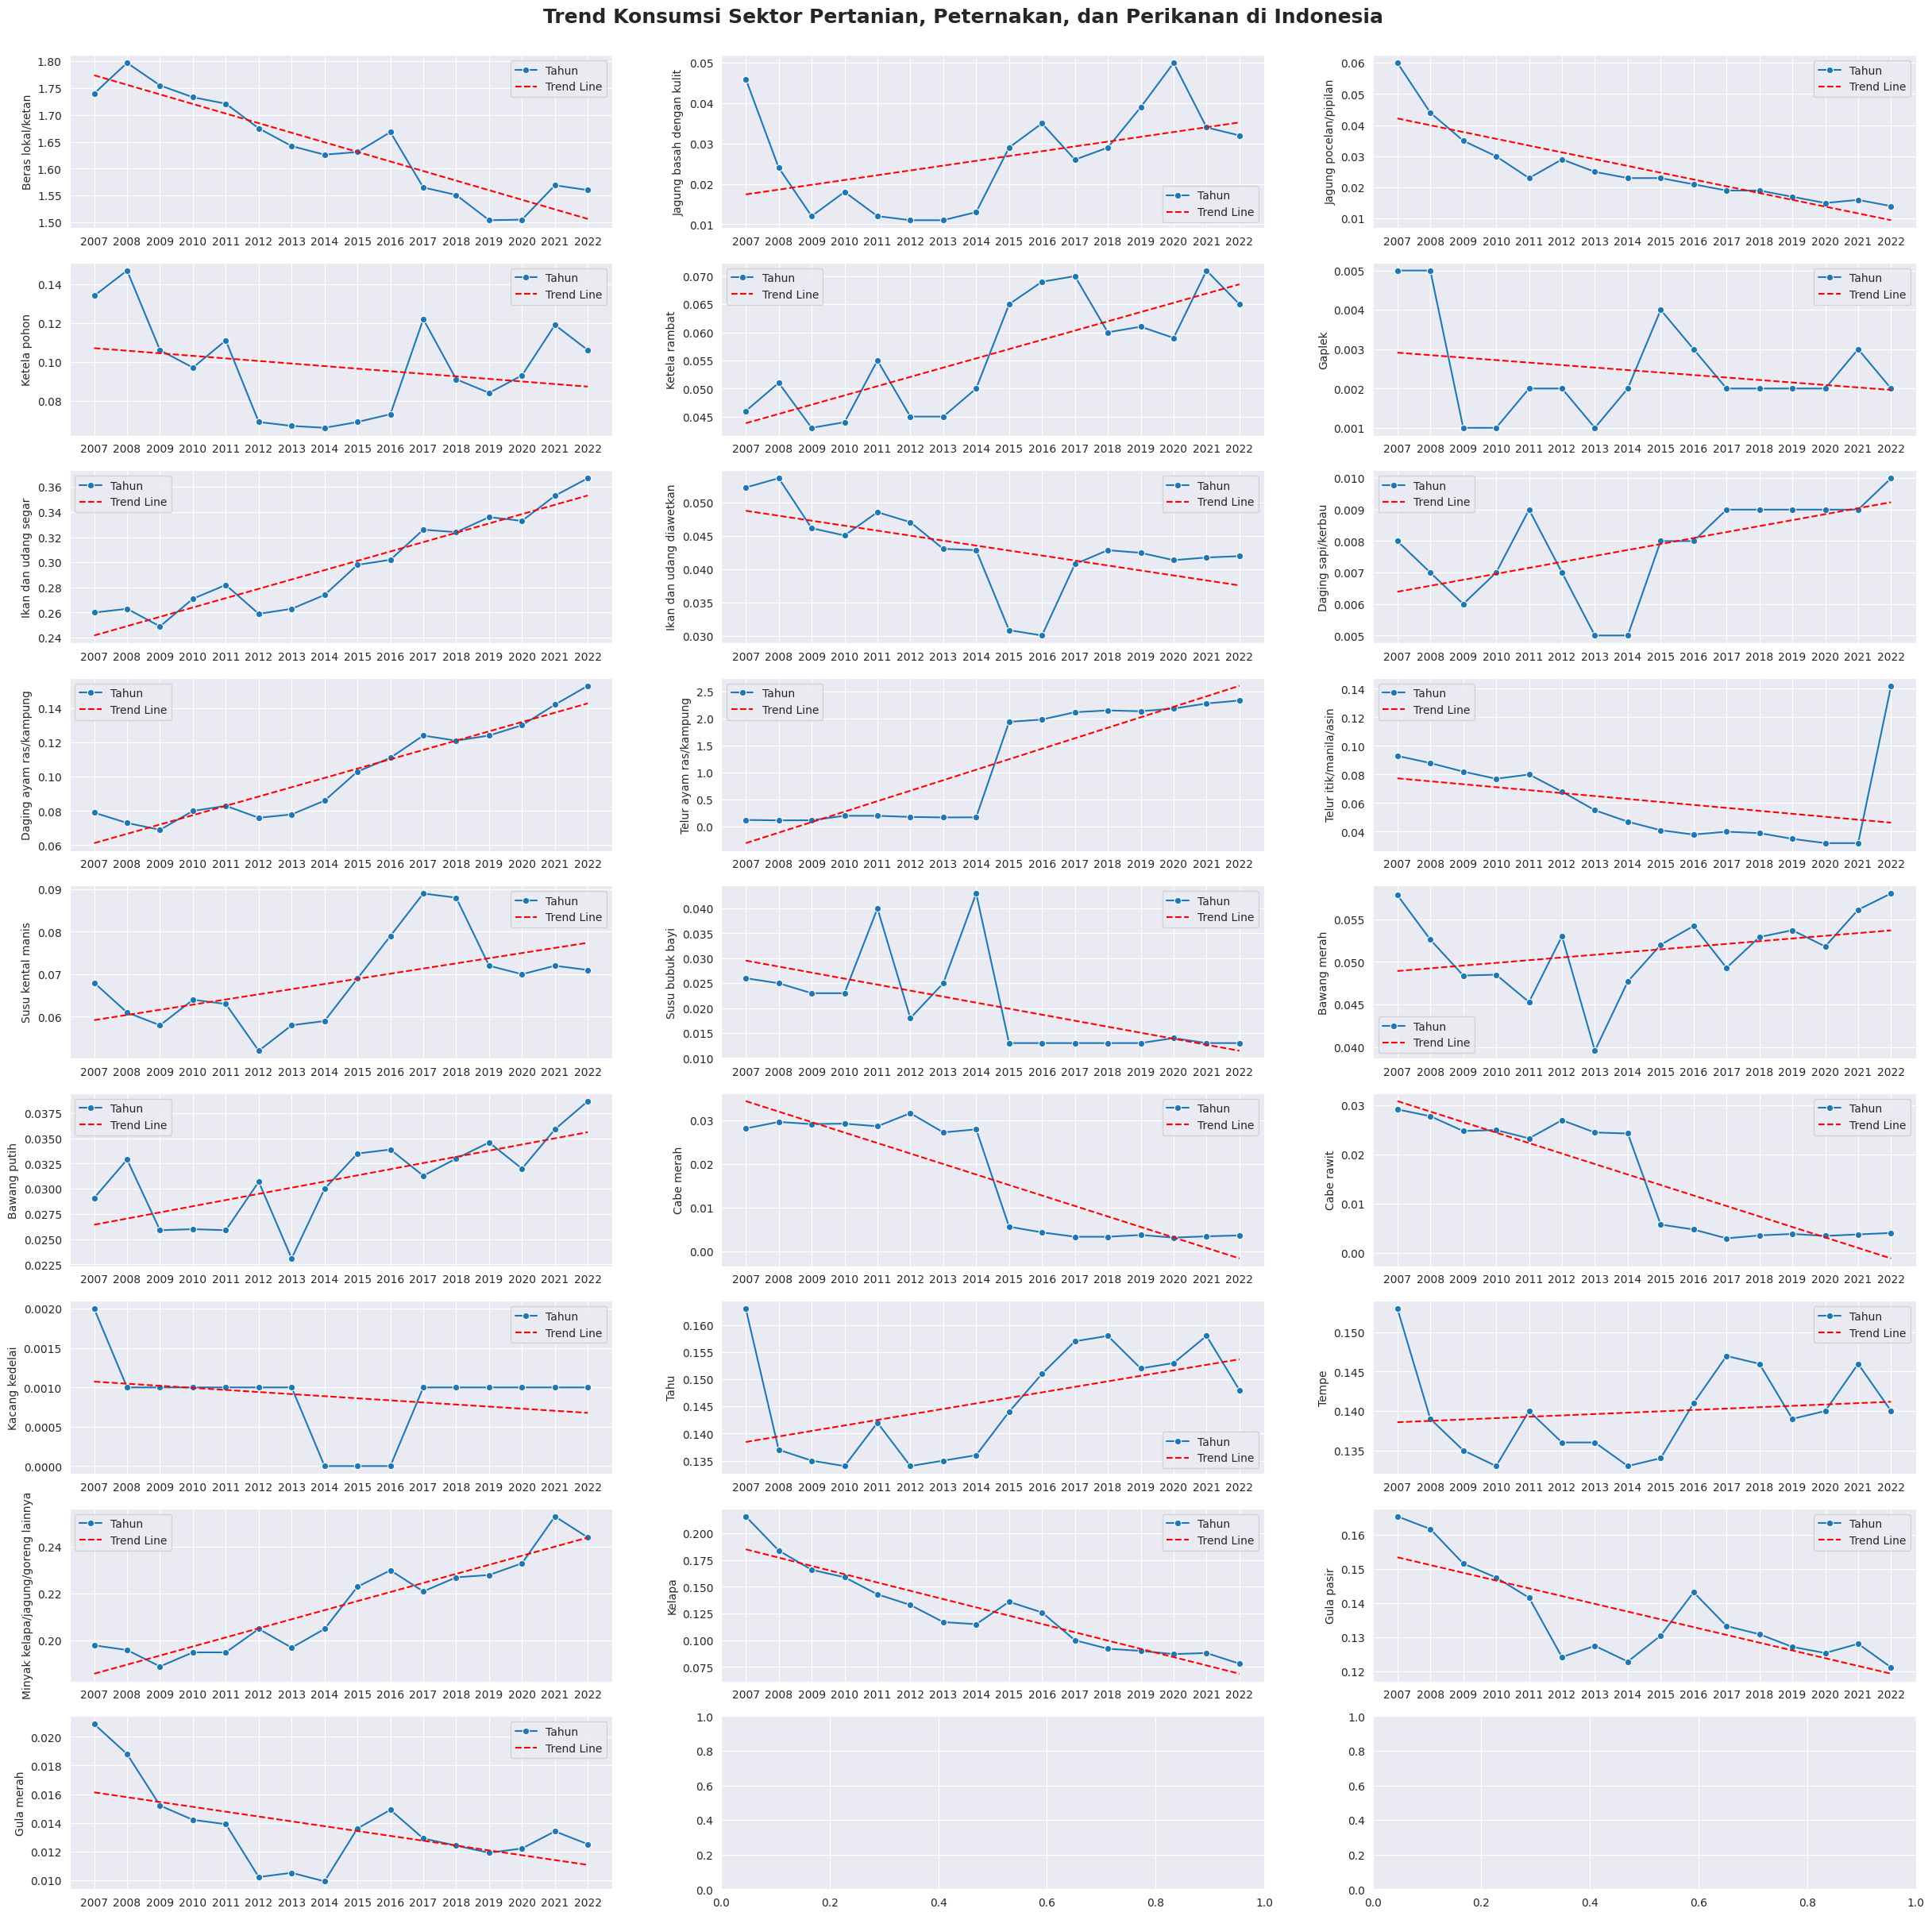

In [ ]:
fig, ax = plt.subplots(nrows=9, ncols=3, figsize=(30, 30))

for i, col in enumerate(temp_konsumsi_pangan.columns):
    sns.lineplot(data=temp_konsumsi_pangan, x=temp_konsumsi_pangan.index, y=col, ax=ax[i//3, i%3], marker="o", label="Tahun")

    # Perform linear regression
    x = np.arange(len(temp_konsumsi_pangan))
    y = temp_konsumsi_pangan[col].astype(float)  # Ensure data is in float64 format
    coefficients = np.polyfit(x, y, 1)
    slope = coefficients[0]
    intercept = coefficients[1]

    # Generate the trend line
    trend_line = slope * x + intercept
    ax[i//3, i%3].plot(x, trend_line, linestyle='--', color='red', label='Trend Line')

    # Add legend
    ax[i//3, i%3].legend()

fig.suptitle('Trend Konsumsi Sektor Pertanian, Peternakan, dan Perikanan di Indonesia', fontsize=18, y=0.9, fontweight='bold')
plt.subplots_adjust(hspace=0.2)

plt.show()

In [ ]:
konsumsi_pangan["Jenis Bahan Makanan"].unique()

array(['Beras lokal/ketan', 'Jagung basah dengan kulit',
       'Jagung pocelan/pipilan', 'Ketela pohon', 'Ketela rambat',
       'Gaplek', 'Ikan dan udang segar', 'Ikan dan udang diawetkan',
       'Daging sapi/kerbau', 'Daging ayam ras/kampung',
       'Telur ayam ras/kampung', 'Telur itik/manila/asin',
       'Susu kental manis', 'Susu bubuk bayi', 'Bawang merah',
       'Bawang putih', 'Cabe merah', 'Cabe rawit', 'Kacang kedelai',
       'Tahu', 'Tempe', 'Minyak kelapa/jagung/goreng lainnya', 'Kelapa',
       'Gula pasir', 'Gula merah'], dtype=object)

Dari tahun ke tahun, berdasarkan **Trend line** dapat dilihat bahwa:
- **Sektor Pertanian:**
    - Konsumsi cenderung **Meningkat**: `Jagung basah dengan kulit`, `Ketela rambat`, `Bawang merah`, `Bawang putih`, `Tahu`, `Tempe`, `Minyak kelapa/jagung/goreng lainnya`
    - Konsumsi cenderung **Menurun**: `Beras lokal/ketan`, `Jagung pocelan/pipilan`, `Ketela pohon`, `Gaplek`, `Cabe merah`, `Cabe rawit`, `Kacang kedelai`, `Kelapa`, `Gula pasir`, `Gula merah`
- **Sektor Perikanan:**
    - Konsumsi cenderung **Meningkat**: `Ikan dan udang segar`
    - Konsumsi cenderung **Menurun**: `Ikan dan udang diawetkan`
- **Sektor Peternakan:**
    - Konsumsi cenderung **Meningkat**: `Daging sapi/kerbau`, `Daging ayam ras/kampung`, `Telur ayam ras/kampung`, `Susu kental manis`
    - Konsumsi cenderung **Menurun**: `Telur itik/manila/asin`, `Susu bubuk bayi`

#### **1. Perbandingan Sektor Pertanian**

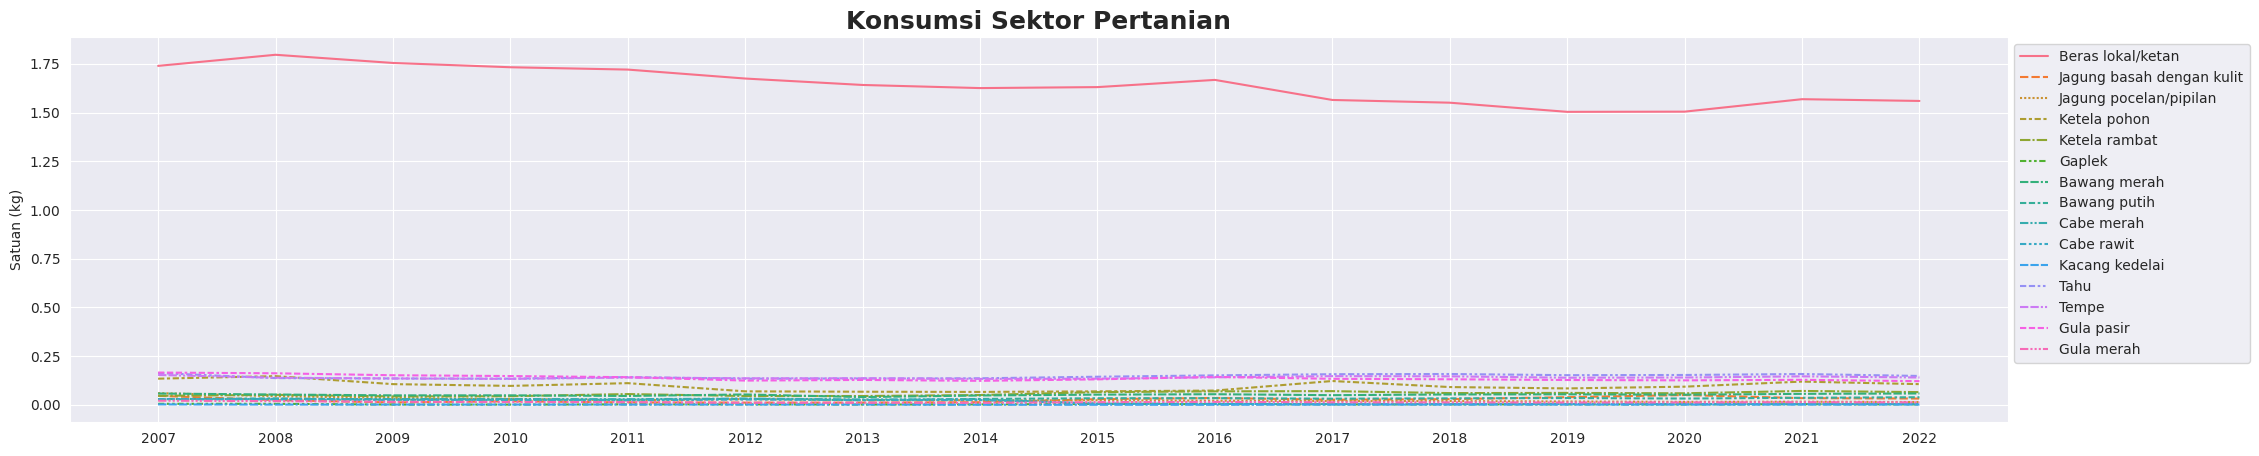

In [ ]:
# Linecharts Pangan "Sektor Pertanian"
# Ingat penghapusan outlier
pertanian_cols = ['Beras lokal/ketan', 'Jagung basah dengan kulit', 'Jagung pocelan/pipilan',
                  'Ketela pohon', 'Ketela rambat', 'Gaplek', 'Bawang merah', 'Bawang putih',
                  'Cabe merah', 'Cabe rawit', 'Kacang kedelai', 'Tahu', 'Tempe', 'Gula pasir', 'Gula merah']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 5))
sns.lineplot(data=pangan_kg.loc[:, pertanian_cols])

plt.title('Konsumsi Sektor Pertanian', fontsize=18, fontweight="bold")
plt.ylabel('Satuan (kg)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

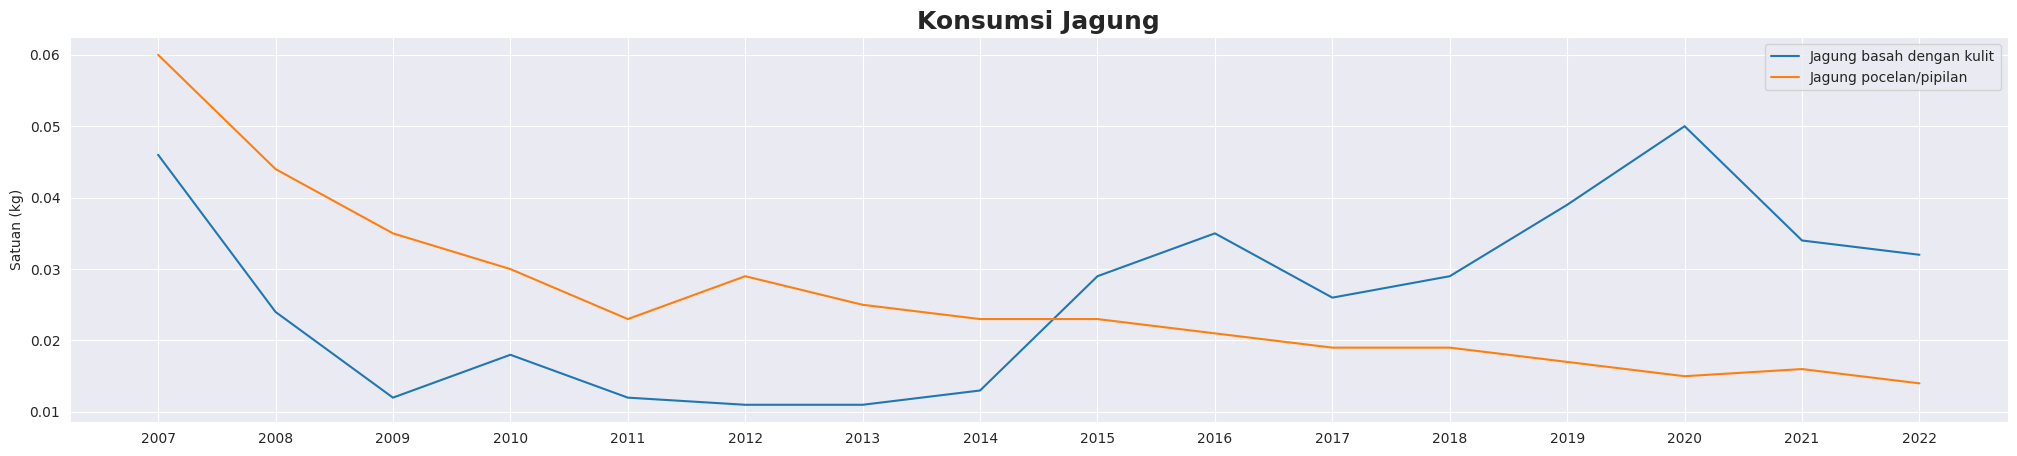

In [ ]:
# Linecharts Pangan "Sektor Pertanian" -- JAGUNG
temp_cols = ['Jagung basah dengan kulit', 'Jagung pocelan/pipilan']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 5))
sns.lineplot(data=pangan_kg.loc[:, temp_cols], dashes=False)

plt.title('Konsumsi Jagung', fontsize=18, fontweight="bold")
plt.ylabel('Satuan (kg)')
plt.show()

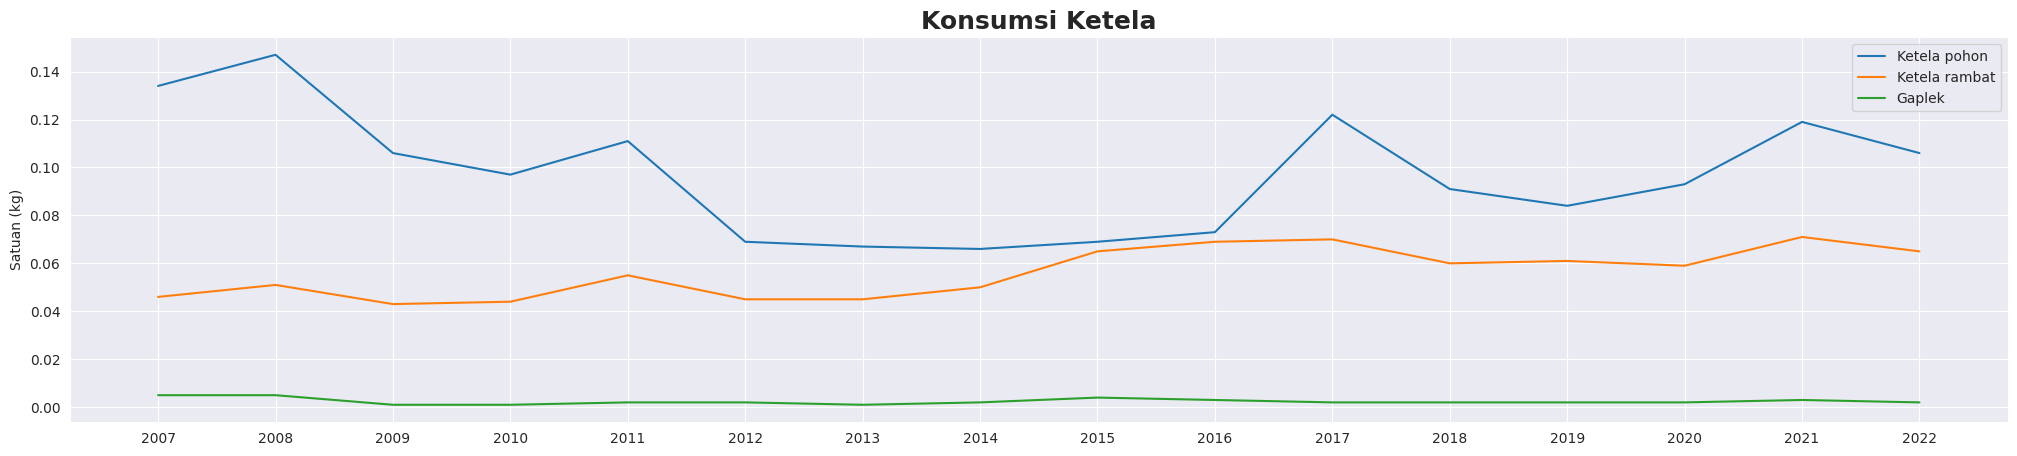

In [ ]:
# Linecharts Pangan "Sektor Pertanian" -- KETELA
temp_cols = ['Ketela pohon', 'Ketela rambat', 'Gaplek']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 5))
sns.lineplot(data=pangan_kg.loc[:, temp_cols], dashes=False)

plt.title('Konsumsi Ketela', fontsize=18, fontweight="bold")
plt.ylabel('Satuan (kg)')
plt.show()

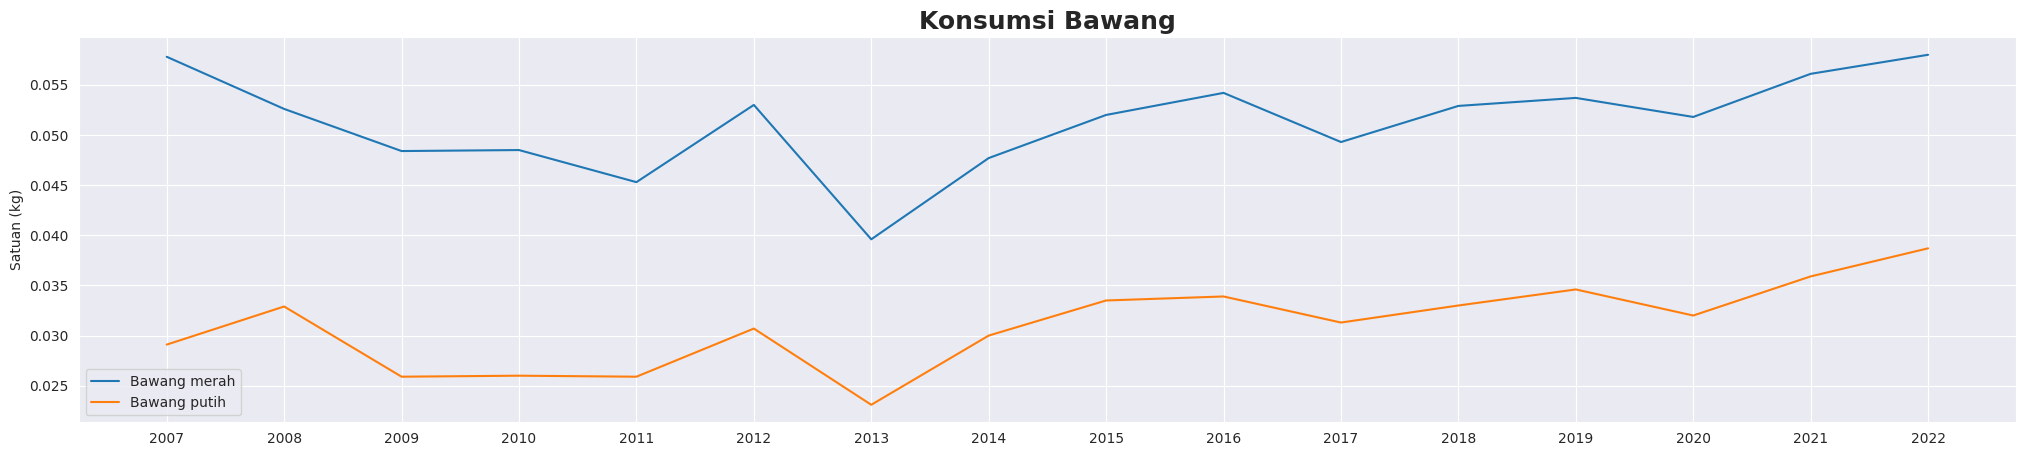

In [ ]:
# Linecharts Pangan "Sektor Pertanian" -- BAWANG
temp_cols = ['Bawang merah', 'Bawang putih']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 5))
sns.lineplot(data=pangan_kg.loc[:, temp_cols], dashes=False)

plt.title('Konsumsi Bawang', fontsize=18, fontweight="bold")
plt.ylabel('Satuan (kg)')
plt.show()

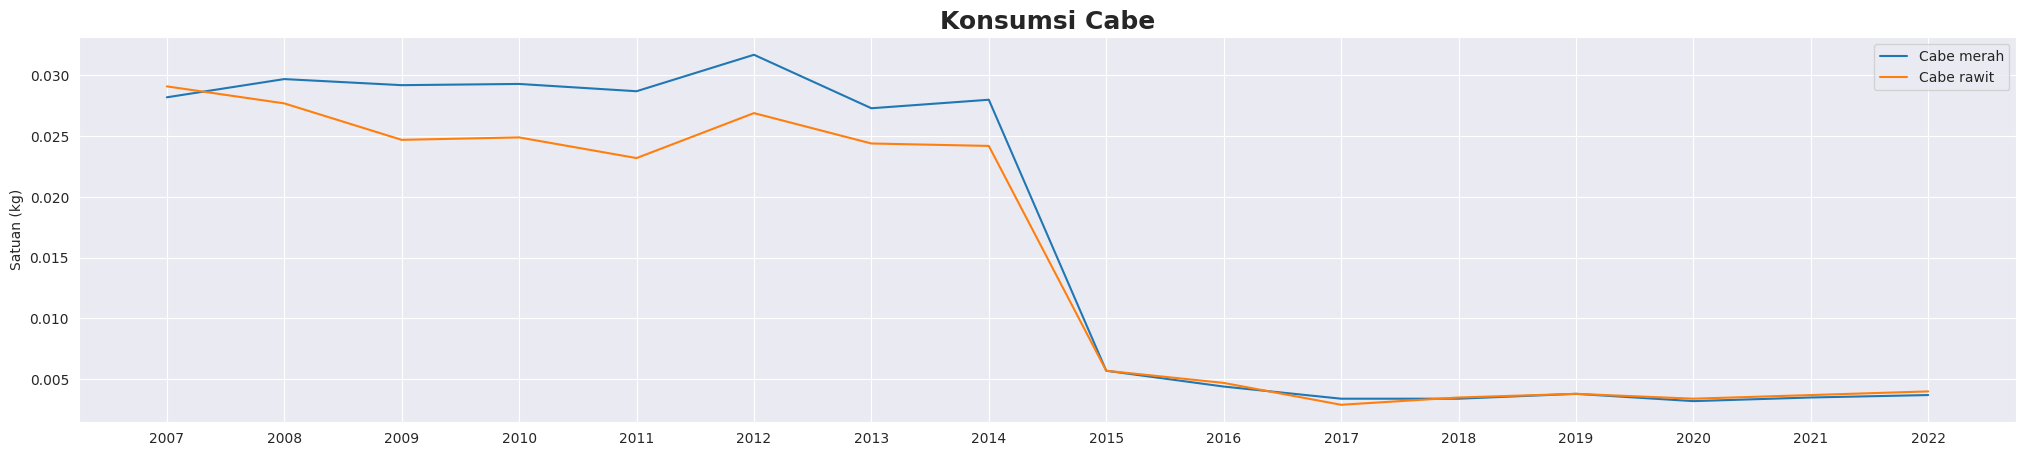

In [ ]:
# Linecharts Pangan "Sektor Pertanian" -- CABE
temp_cols = ['Cabe merah', 'Cabe rawit']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 5))
sns.lineplot(data=pangan_kg.loc[:, temp_cols], dashes=False)

plt.title('Konsumsi Cabe', fontsize=18, fontweight="bold")
plt.ylabel('Satuan (kg)')
plt.show()

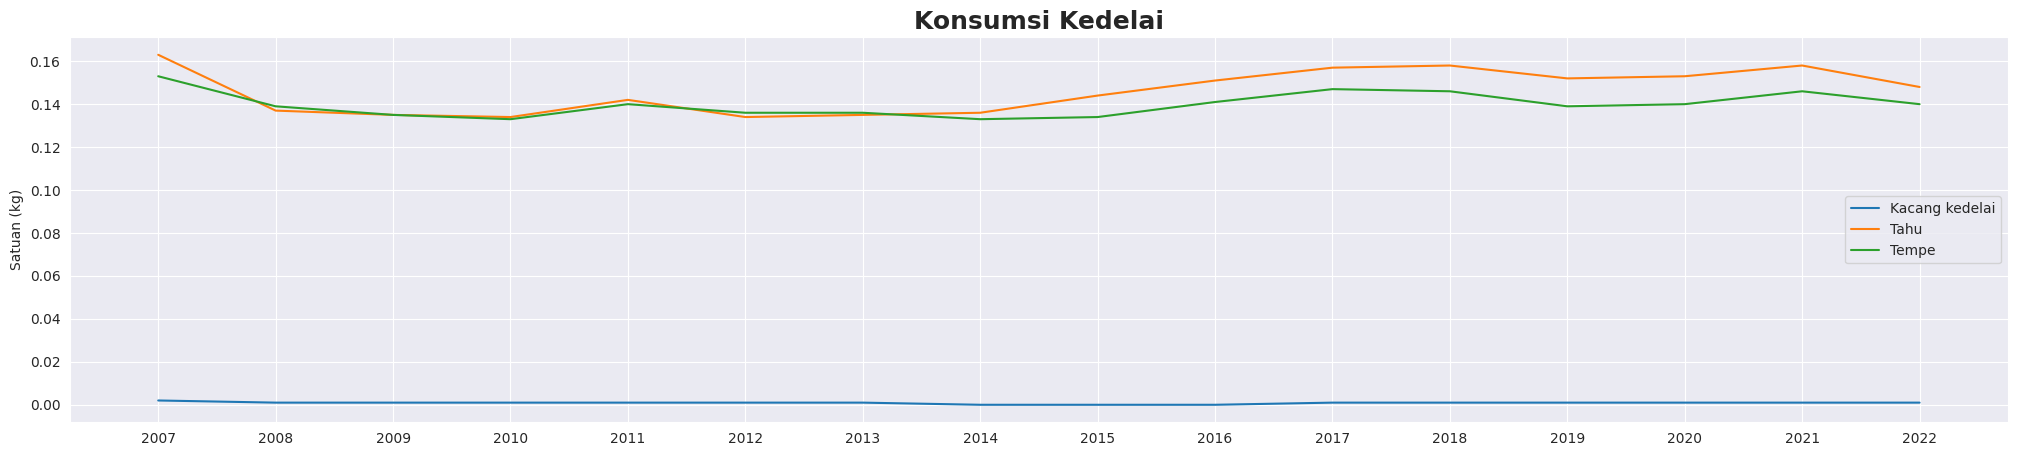

In [ ]:
# Linecharts Pangan "Sektor Pertanian" -- KEDELAI
temp_cols = ['Kacang kedelai', 'Tahu', 'Tempe']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 5))
sns.lineplot(data=pangan_kg.loc[:, temp_cols], dashes=False)

plt.title('Konsumsi Kedelai', fontsize=18, fontweight="bold")
plt.ylabel('Satuan (kg)')
plt.show()

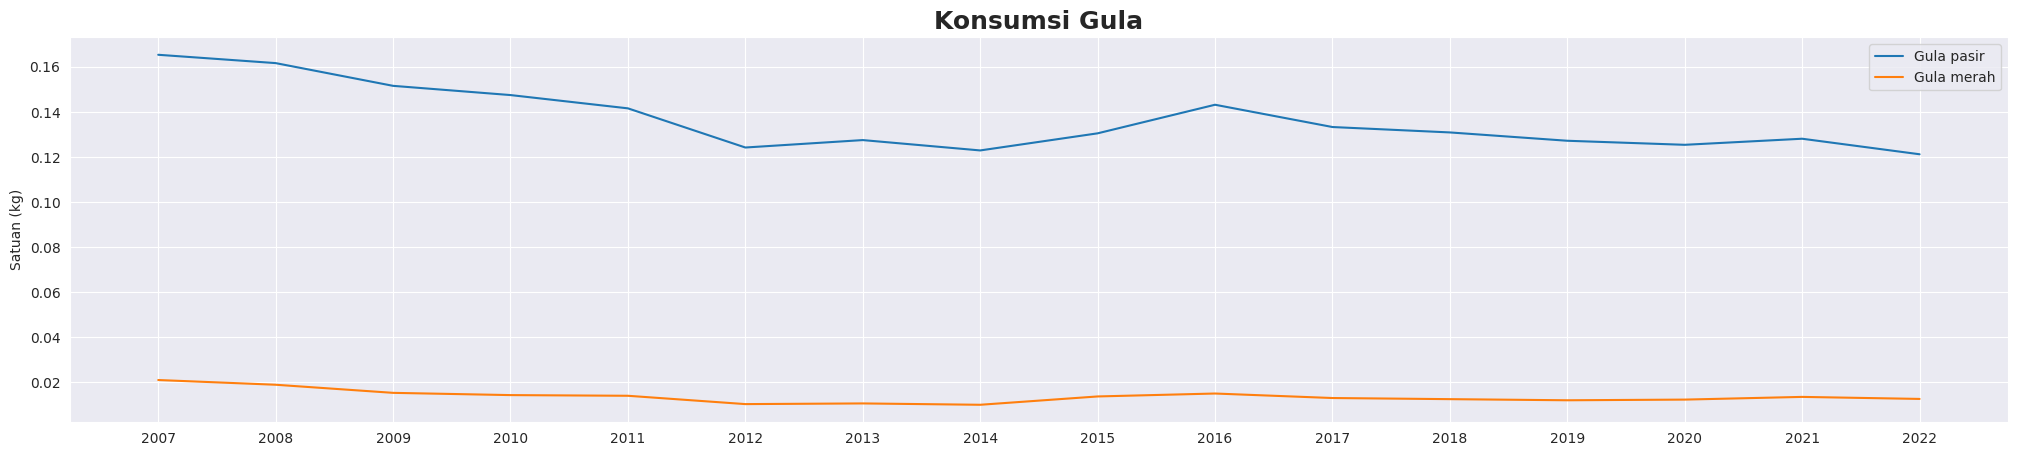

In [ ]:
# Linecharts Pangan "Sektor Pertanian" -- GULA
temp_cols = ['Gula pasir', 'Gula merah']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 5))
sns.lineplot(data=pangan_kg.loc[:, temp_cols], dashes=False)

plt.title('Konsumsi Gula', fontsize=18, fontweight="bold")
plt.ylabel('Satuan (kg)')
plt.show()

#### **2. Perbandingan Sektor Perikanan**

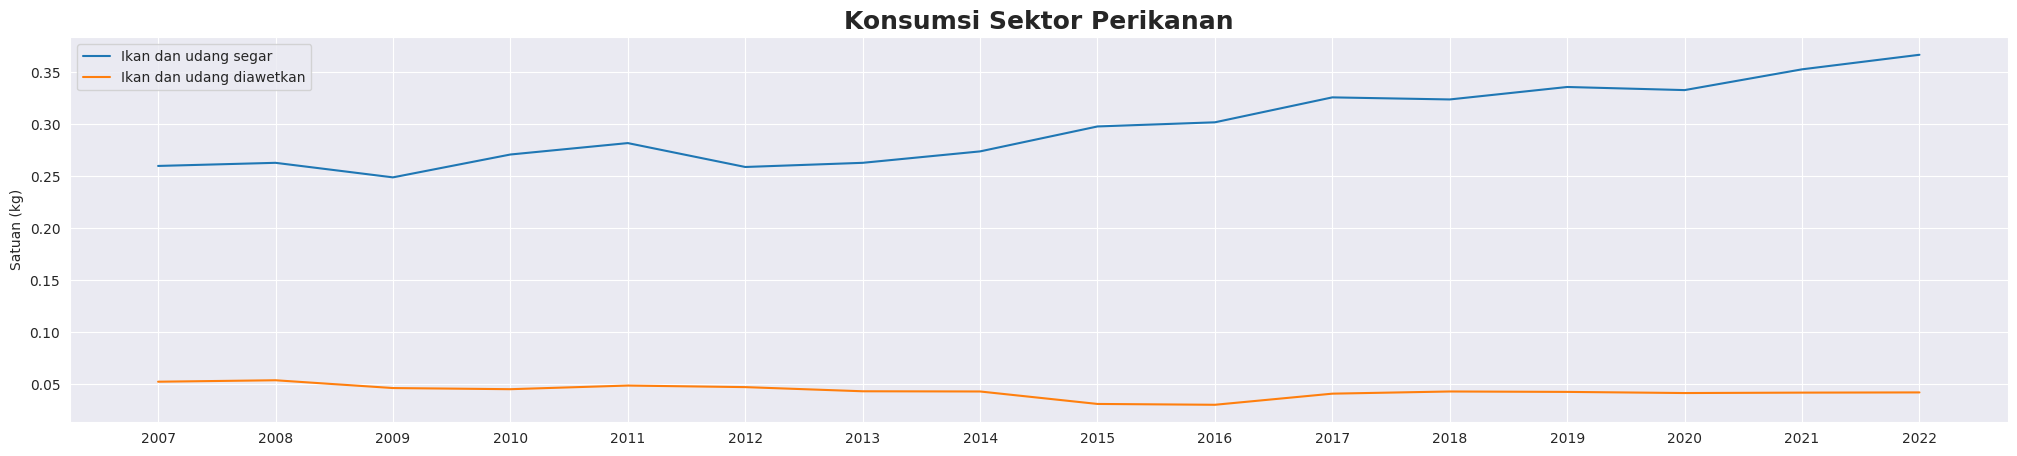

In [ ]:
# Linecharts Pangan "Sektor Perikanan"
perikanan_cols = ['Ikan dan udang segar', 'Ikan dan udang diawetkan']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 5))
sns.lineplot(data=pangan_kg.loc[:, perikanan_cols], dashes=False)

plt.title('Konsumsi Sektor Perikanan', fontsize=18, fontweight="bold")
plt.ylabel('Satuan (kg)')
plt.show()

#### **3. Perbandingan Sektor Peternakan**

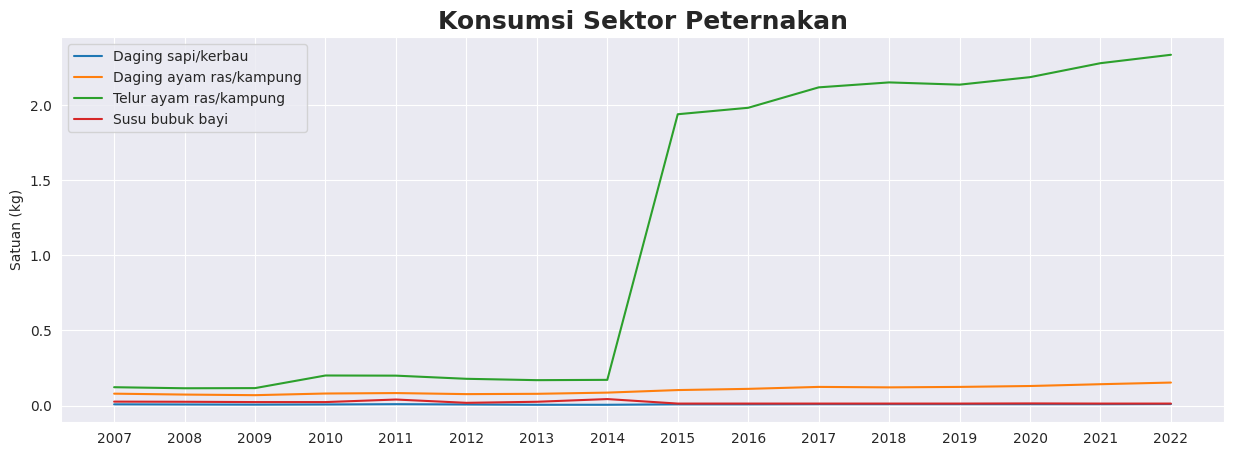

In [ ]:
# Linecharts Pangan "Sektor Peternakan"
# Ingat penghapusan outlier
peternakan_cols = ['Daging sapi/kerbau', 'Daging ayam ras/kampung',
       'Telur ayam ras/kampung', 'Susu bubuk bayi']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.lineplot(data=pangan_kg.loc[:, peternakan_cols], dashes=False)

plt.title('Konsumsi Sektor Peternakan', fontsize=18, fontweight="bold")
plt.ylabel('Satuan (kg)')
plt.show()

#### **4. Konklusi**

In [ ]:
print(f"Banyak jenis pangan sektor 'Pertanian' pada dataset = {len(pertanian_cols) + 2}") # Ingat ada satuan outlier
print(f"Banyak jenis pangan sektor 'Perikanan' pada dataset = {len(perikanan_cols)}")
print(f"Banyak jenis pangan sektor 'Peternakan' pada dataset = {len(peternakan_cols) + 2}") # Ingat ada satuan outlier

Banyak jenis pangan sektor 'Pertanian' pada dataset = 17
Banyak jenis pangan sektor 'Perikanan' pada dataset = 2
Banyak jenis pangan sektor 'Peternakan' pada dataset = 6


**The key takeaway:**
- Sektor **Pertanian**:
    - Kemungkinan surplus untuk `Beras lokal/ketan` (2022).
    - **7/17** jenis pangan konsumsinya meningkat, **10/17** menurun.
- Sektor **Perikanan**:
    - Kemungkinan defisit untuk `Ikan dan udang` (2021).
    - **1/2** jenis pangan konsumsinya meningkat, **1/2** menurun --- semua bahan dasarnya `Ikan dan udang`.
- Sektor **Peternakan**:
    - Kemungkinan surplus untuk `Daging sapi/kerbau` (2022).
    - **4/6** jenis pangan konsumsinya meningkat, **2/6** menurun.

**Note:** gabisa cek perbandingan konsumsi dan produksi pangan 2023, dst karena gk ada dataset produksi 2023, dst.

### **Produksi Pangan**

#### **1. Sektor Pertanian**

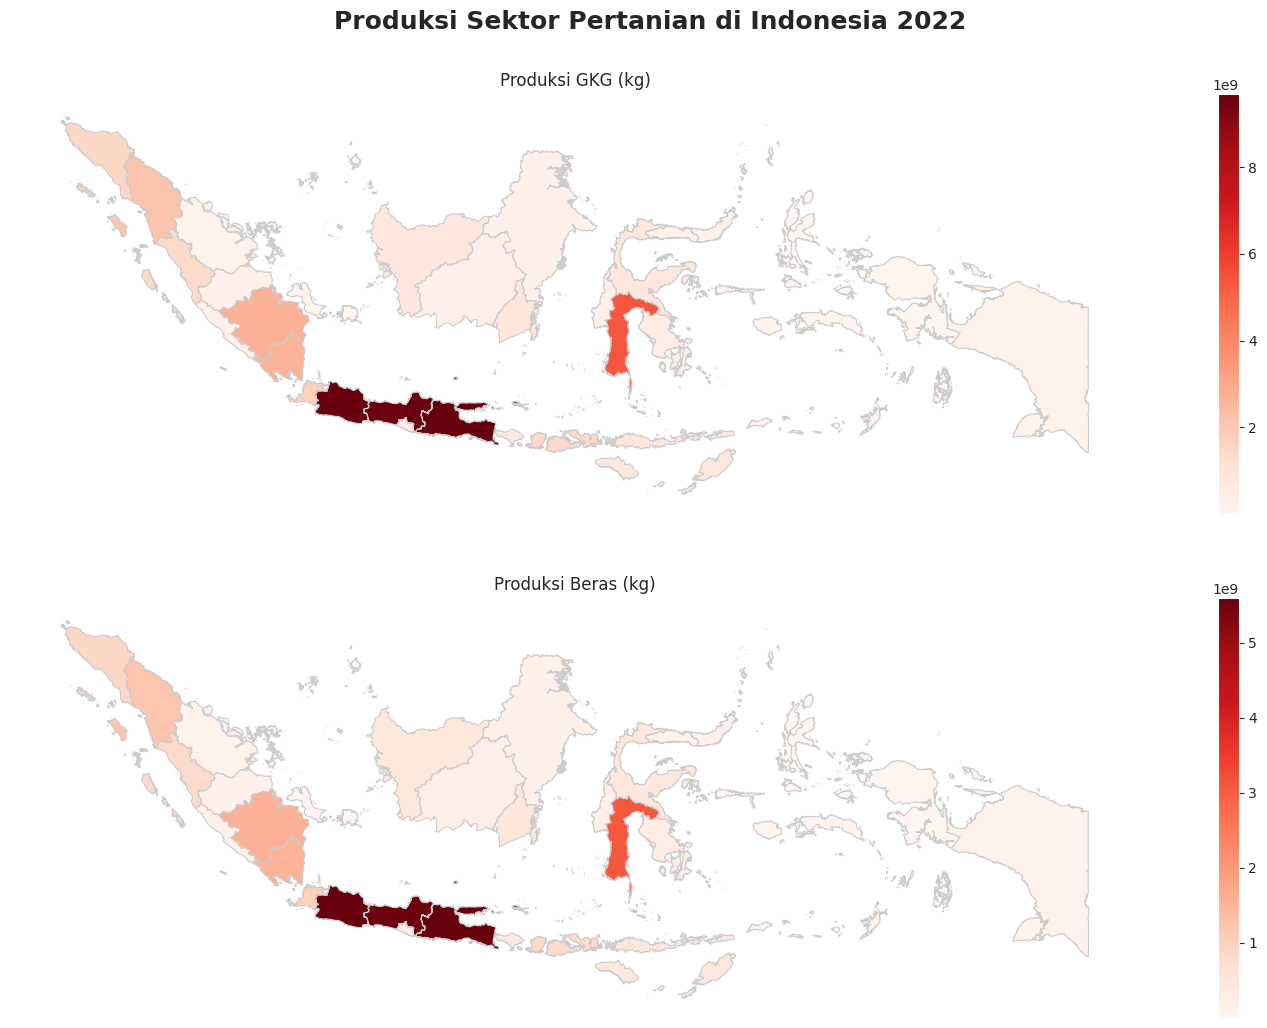

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))
fig.suptitle('Produksi Sektor Pertanian di Indonesia 2022', fontsize=18, y=0.95, fontweight='bold')

for i, col in enumerate(pertanian.columns[1:]):
    # Set the value range for the choropleth map
    vmin, vmax = produksi_pangan_no_indo[col].min(), produksi_pangan_no_indo[col].max()

    # Remove the axis as we do not need it
    ax[i].axis('off')
    ax[i].set_title(col, fontdict={'fontsize':'12', 'fontweight':'10'})
    produksi_pangan_no_indo.plot(column=col, cmap='Reds', linewidth=0.8, ax=ax[i], edgecolor='0.8', norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=True);

**Note:** meskipun mirip, tapi lihat Axis-nya

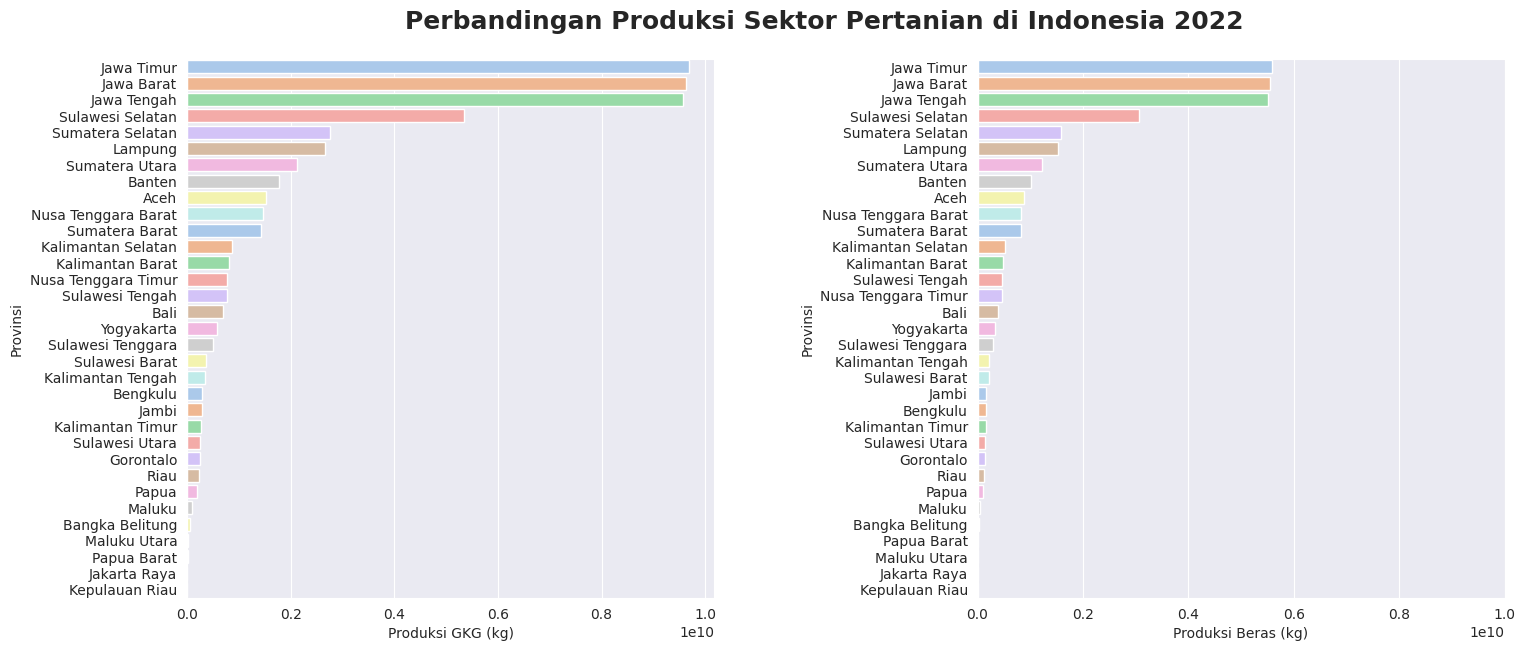

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

for i, col in enumerate(pertanian.columns[1:]):
    sns.barplot(data=produksi_pangan_no_indo.sort_values(by=col, ascending=False), x=col, y="Provinsi", ax=ax[i], palette="pastel")

# Set the axis range
plt.xlim(0, 1e10)

fig.suptitle('Perbandingan Produksi Sektor Pertanian di Indonesia 2022', fontsize=18, y=0.95, fontweight='bold')
plt.subplots_adjust(wspace=0.5)

#### **2. Sektor Perikanan**

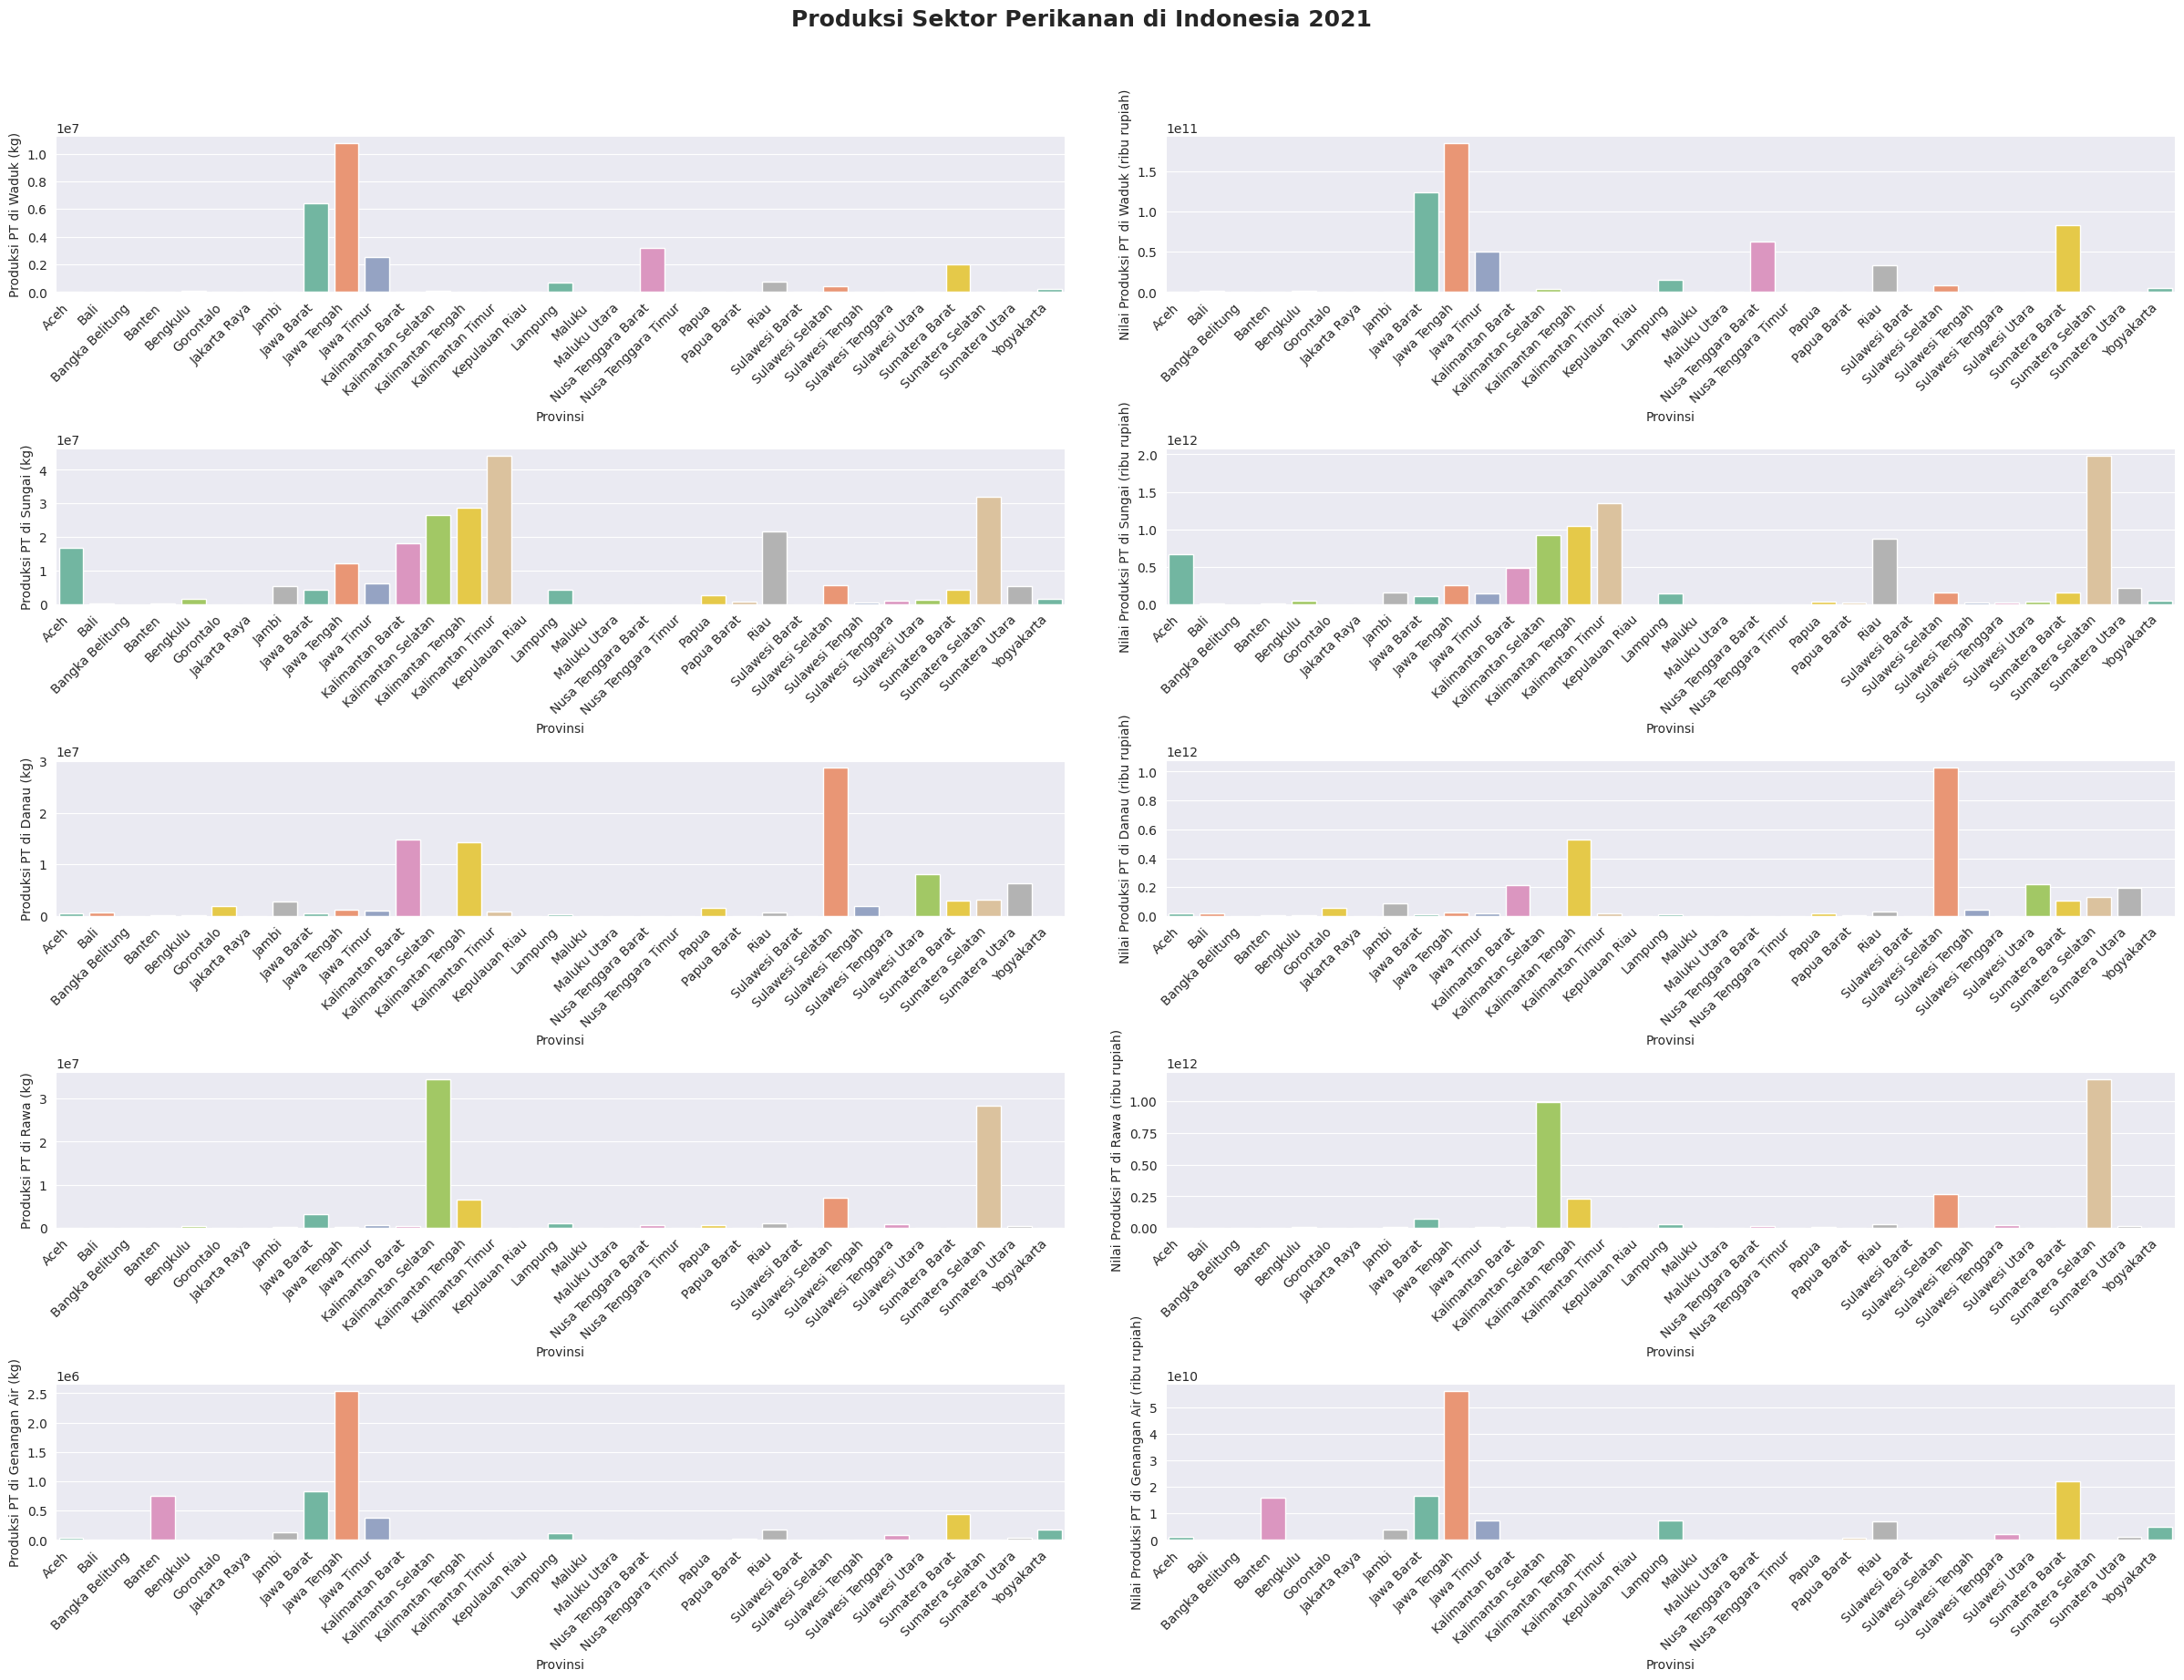

In [ ]:
# Barplot "Produksi dan Nilai Produksi" Perikanan
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(30, 20))

# Perikanan Ternak (kg)
for i, col in enumerate(perikanan.columns[1::2]):
    sns.barplot(data=produksi_pangan_no_indo, x="Provinsi", y=col, ax=ax[i, 0], palette="Set2")
    plt.setp(ax[i, 0].get_xticklabels(), rotation=45, ha="right")

# NILAI Perikanan Ternak (ribu rupiah)
for i, col in enumerate(perikanan.columns[2::2]):
    sns.barplot(data=produksi_pangan_no_indo, x="Provinsi", y=col, ax=ax[i, 1], palette="Set2")
    plt.setp(ax[i, 1].get_xticklabels(), rotation=45, ha="right")

fig.suptitle('Produksi Sektor Perikanan di Indonesia 2021', fontsize=18, y=0.95, fontweight='bold')
plt.subplots_adjust(hspace=1, wspace=0.1)

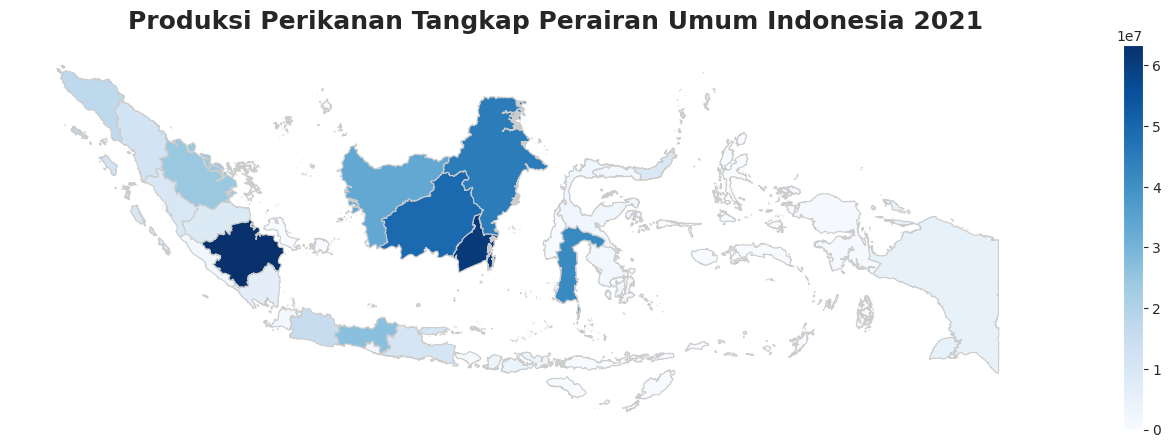

In [ ]:
temp_df = produksi_pangan_no_indo.copy()
temp_df["Total produksi PT per Provinsi"] = produksi_pangan_no_indo.iloc[:, 9] + produksi_pangan_no_indo.iloc[:, 11] +  produksi_pangan_no_indo.iloc[:, 13] +  produksi_pangan_no_indo.iloc[:, 15] +  produksi_pangan_no_indo.iloc[:, 17]

# Sektor Perikanan 2021
fig, ax = plt.subplots(figsize=(20, 5))
fig.suptitle('Produksi Perikanan Tangkap Perairan Umum Indonesia 2021', fontsize=18, y=0.95, fontweight='bold')

# Set the value range for the choropleth map
vmin, vmax = temp_df["Total produksi PT per Provinsi"].min(), temp_df["Total produksi PT per Provinsi"].max()

# Remove the axis as we do not need it
ax.axis('off')
temp_df.plot(column="Total produksi PT per Provinsi", cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=True);

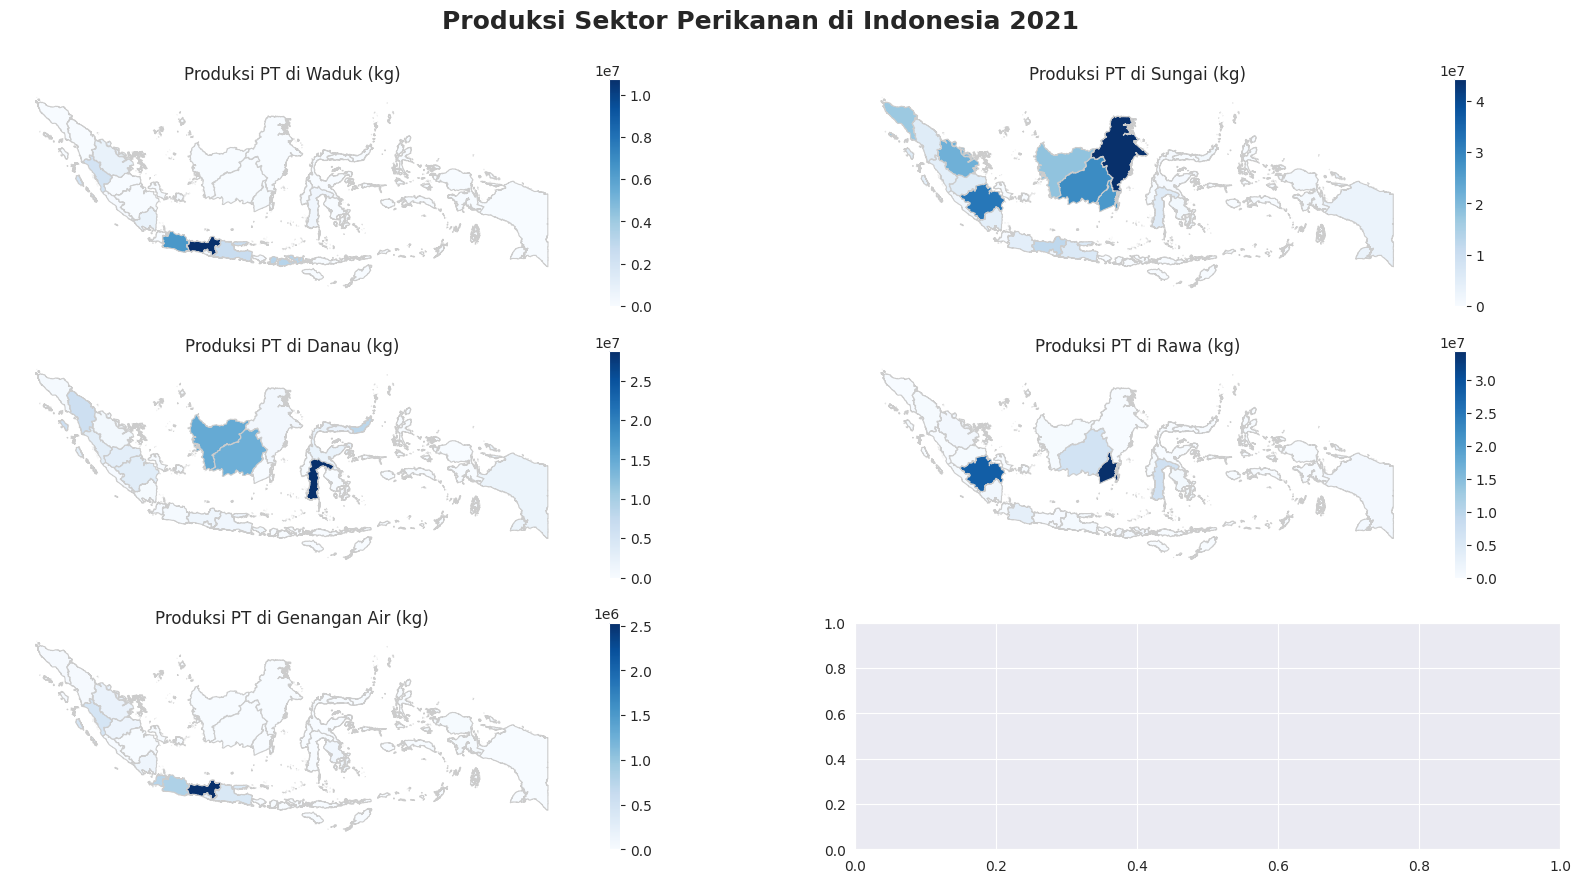

In [ ]:
# Sektor Perikanan 2022
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
fig.suptitle('Produksi Sektor Perikanan di Indonesia 2021', fontsize=18, y=0.95, fontweight='bold')

for i, col in enumerate(perikanan.columns[1::2]):
    # Set the value range for the choropleth map
    vmin, vmax = produksi_pangan_no_indo[col].min(), produksi_pangan_no_indo[col].max()

    # Remove the axis as we do not need it
    ax[i//2, i%2].axis('off')
    ax[i//2, i%2].set_title(col, fontdict={'fontsize':'12', 'fontweight':'10'})
    produksi_pangan_no_indo.plot(column=col, cmap='Blues', linewidth=0.8, ax=ax[i//2, i%2], edgecolor='0.8', norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=True);

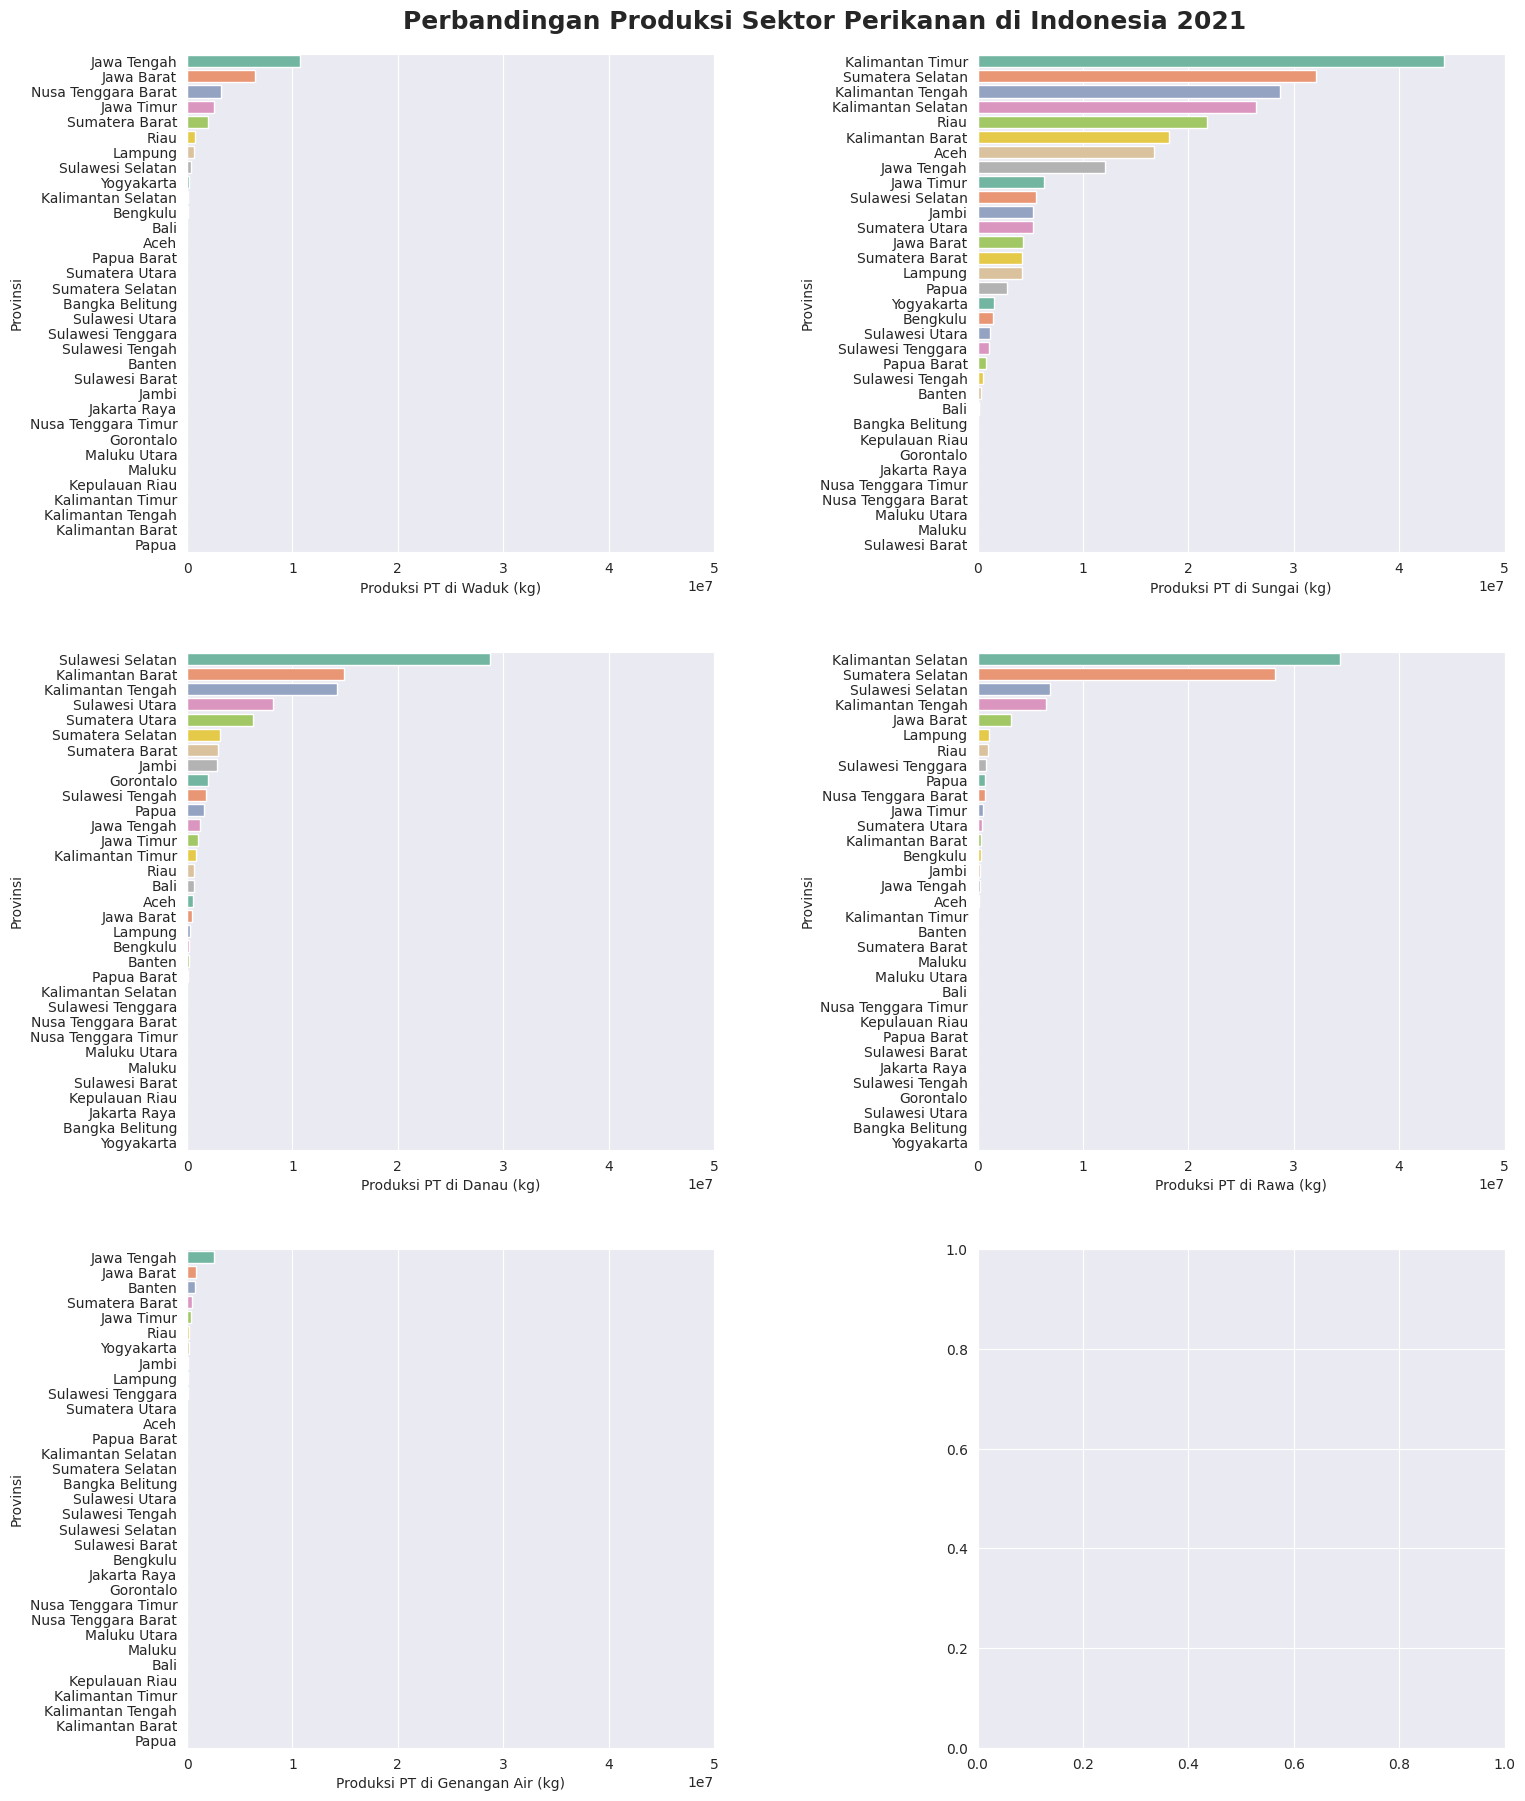

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(17, 22))

for i, col in enumerate(perikanan.columns[1::2]):
    sns.barplot(data=produksi_pangan_no_indo.sort_values(by=col, ascending=False), x=col, y="Provinsi", ax=ax[i//2, i%2], palette="Set2")
    # Set the axis range
    ax[i//2, i%2].set_xlim(0, 5*1e7)

fig.suptitle('Perbandingan Produksi Sektor Perikanan di Indonesia 2021', fontsize=18, y=0.9, fontweight='bold')
plt.subplots_adjust(wspace=0.5)

In [ ]:
produksi_pangan.iloc[-1][9::2]

Produksi PT di Waduk (kg)            27176000.0
Produksi PT di Sungai (kg)          245100000.0
Produksi PT di Danau (kg)            93026000.0
Produksi PT di Rawa (kg)             85940000.0
Produksi PT di Genangan Air (kg)      5705000.0
Name: 34, dtype: object

In [ ]:
produksi_pangan.iloc[-1][10::2]

Nilai Produksi PT di Waduk (ribu rupiah)            572377682000.0
Nilai Produksi PT di Sungai (ribu rupiah)          8860623974000.0
Nilai Produksi PT di Danau (ribu rupiah)           2799762969000.0
Nilai Produksi PT di Rawa (ribu rupiah)            2896956200000.0
Nilai Produksi PT di Genangan Air (ribu rupiah)     146373142000.0
Name: 34, dtype: object

In [ ]:
print("Total produksi:", produksi_pangan.iloc[-1][9::2].sum())
print("Total Nilai produksi:", produksi_pangan.iloc[-1][10::2].sum())

Total produksi: 456947000.0
Total Nilai produksi: 15276093967000.0


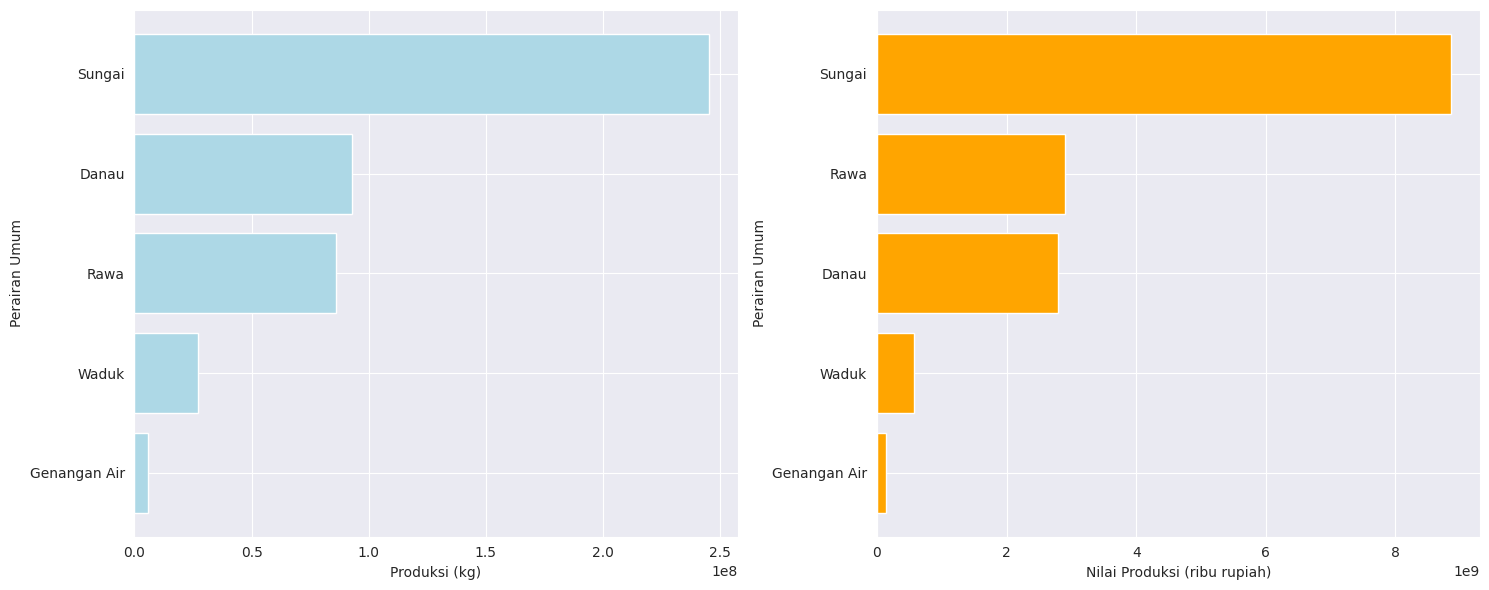

In [ ]:
categories = ['Waduk', 'Sungai', 'Danau', 'Rawa', 'Genangan Air']
productions_kg = [27176000.0, 245100000.0, 93026000.0, 85940000.0, 5705000.0]
productions_rp = [572377682.0, 8860623974.0, 2799762969.0, 2896956200.0, 146373142.0]

# Sort the values from highest to lowest
sorted_indices_kg = sorted(range(len(productions_kg)), key=lambda i: productions_kg[i])
sorted_indices_rp = sorted(range(len(productions_rp)), key=lambda i: productions_rp[i])
sorted_categories_kg = [categories[i] for i in sorted_indices_kg]
sorted_categories_rp = [categories[i] for i in sorted_indices_rp]
sorted_productions_kg = [productions_kg[i] for i in sorted_indices_kg]
sorted_productions_rp = [productions_rp[i] for i in sorted_indices_rp]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Bar plot for productions in kg (sorted)
ax[0].barh(sorted_categories_kg, sorted_productions_kg, color='lightblue')
ax[0].set_xlabel('Produksi (kg)')
ax[0].set_ylabel('Perairan Umum')

# Bar plot for productions in rupiah (sorted)
ax[1].barh(sorted_categories_rp, sorted_productions_rp, color='orange')
ax[1].set_xlabel('Nilai Produksi (ribu rupiah)')
ax[1].set_ylabel('Perairan Umum')

plt.tight_layout()
plt.show()

In [ ]:
# Menghitung nilai produksi perikanan per kg
produksi_pangan_perikanan = produksi_pangan.iloc[:,9:]
produksi_pangan_perikanan.head()

Produksi PT di Waduk (kg)  Nilai Produksi PT di Waduk (ribu rupiah)  \
0                    28000.0                              7.060830e+08   
1                        0.0                              0.000000e+00   
2                  1986000.0                              8.273360e+10   
3                   774000.0                              3.363723e+10   
4                        0.0                              0.000000e+00   

   Produksi PT di Sungai (kg)  Nilai Produksi PT di Sungai (ribu rupiah)  \
0                  16778000.0                               6.673185e+11   
1                   5219000.0                               2.178470e+11   
2                   4265000.0                               1.521026e+11   
3                  21768000.0                               8.735673e+11   
4                   5262000.0                               1.586136e+11   

   Produksi PT di Danau (kg)  Nilai Produksi PT di Danau (ribu rupiah)  \
0                   553000.0                              1.528523e+10   
1                  6274000.0                              1.977767e+11   
2                  2984000.0                              1.050931e+11   
3                   683000.0                              3.149444e+10   
4                  2849000.0                              8.749009e+10   

   Produksi PT di Rawa (kg)  Nilai Produksi PT di Rawa (ribu rupiah)  \
0                  118000.0                             4.141652e+09   
1                  402000.0                             1.613171e+10   
2                   13000.0                             4.333000e+08   
3                  999000.0                             3.064134e+10   
4                  276000.0                             7.032361e+09   

   Produksi PT di Genangan Air (kg)  \
0                           37000.0   
1                           39000.0   
2                          441000.0   
3                          175000.0   
4                          129000.0   

   Nilai Produksi PT di Genangan Air (ribu rupiah)  
0                                     1.126880e+09  
1                                     1.068410e+09  
2                                     2.209784e+10  
3                                     6.963165e+09  
4                                     3.917911e+09

In [ ]:
for index,col in enumerate(produksi_pangan_perikanan.columns):
  if index % 2 == 0:
    continue
  produksi_pangan[col+" per kg"] = produksi_pangan[col] / produksi_pangan[produksi_pangan_perikanan.columns[index-1]]
produksi_pangan.fillna(0,inplace=True)
produksi_pangan

Provinsi  Produksi Daging Sapi (kg)  \
0                      Aceh               1.201496e+07   
1             SumateraUtara               1.385909e+07   
2             SumateraBarat               2.151466e+07   
3                      Riau               9.127691e+06   
4                     Jambi               5.760105e+06   
5           SumateraSelatan               1.545887e+07   
6                  Bengkulu               3.329267e+06   
7                   Lampung               2.117620e+07   
8   KepulauanBangkaBelitung               3.395043e+06   
9             KepulauanRiau               1.390390e+06   
10               DKIJakarta               1.761761e+07   
11                JawaBarat               8.496062e+07   
12               JawaTengah               6.139394e+07   
13             DIYogyakarta               7.899896e+06   
14                JawaTimur               1.109912e+08   
15                   Banten               1.724269e+07   
16                     Bali               4.694033e+06   
17        NusaTenggaraBarat               1.115901e+07   
18        NusaTenggaraTimur               8.680437e+06   
19          KalimantanBarat               5.095886e+06   
20         KalimantanTengah               4.113865e+06   
21        KalimantanSelatan               7.351353e+06   
22          KalimantanTimur               7.465561e+06   
23          KalimantanUtara               8.955692e+05   
24            SulawesiUtara               3.169388e+06   
25           SulawesiTengah               5.967195e+06   
26          SulawesiSelatan               1.627751e+07   
27         SulawesiTenggara               4.525615e+06   
28                Gorontalo               2.918750e+06   
29            SulawesiBarat               1.725341e+06   
30                   Maluku               2.308116e+06   
31              MalukuUtara               1.320507e+06   
32               PapuaBarat               1.506021e+06   
33                    Papua               2.616771e+06   
34                Indonesia               4.989231e+08   

    Produksi Daging Kerbau (kg)  Produksi Daging Kuda (kg)  \
0                    2774437.50                       0.00   
1                    2260407.82                   39206.25   
2                    1980639.25                    2700.00   
3                    2008639.76                       0.00   
4                    1783840.44                     147.00   
5                     702287.87                       0.00   
6                     313996.80                       0.00   
7                     184058.32                       0.00   
8                          0.00                       0.00   
9                          0.00                       0.00   
10                     26953.82                       0.00   
11                   1655136.50                       0.00   
12                   1510268.00                    1060.00   
13                      1680.00                   82500.00   
14                     71648.31                   22339.67   
15                   1283747.13                       0.00   
16                     19224.58                       0.00   
17                    838418.12                   78459.34   
18                   1232632.98                  300450.00   
19                     33780.00                       0.00   
20                     70575.50                       0.00   
21                    396701.47                       0.00   
22                     64562.20                       0.00   
23                     10302.49                       0.00   
24                         0.00                       0.00   
25                     20711.25                    1200.00   
26                   1499507.20                  770100.00   
27                     32767.96                   17250.00   
28                         0.00                       0.00   
29                    233898.76                     450.00   
30      

#### **3. Sektor Peternakan**

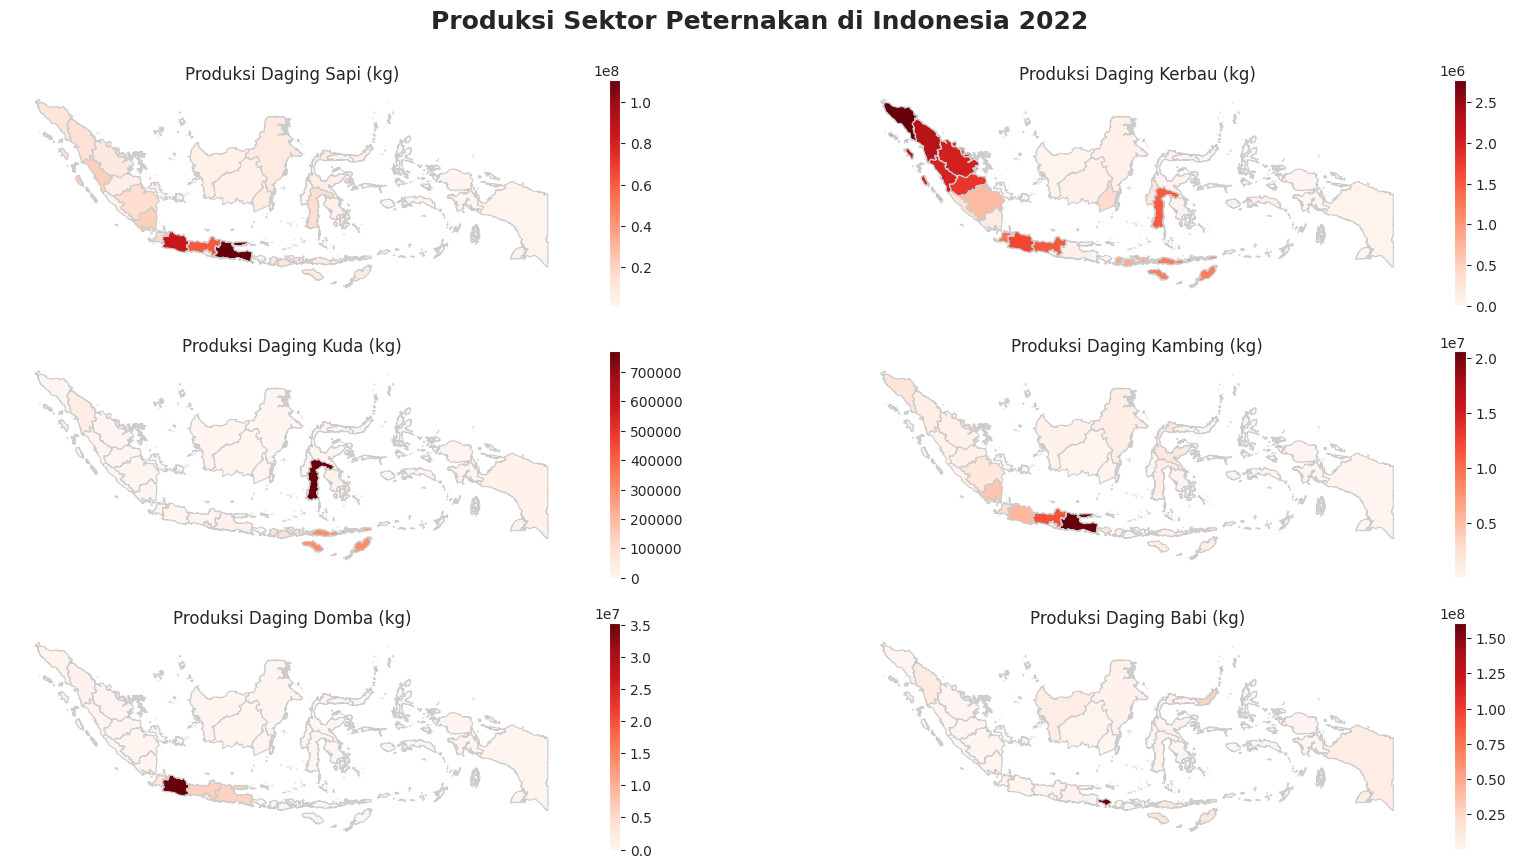

In [ ]:
# Sektor Peternakan 2022
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
fig.suptitle('Produksi Sektor Peternakan di Indonesia 2022', fontsize=18, y=0.95, fontweight='bold')

for i, col in enumerate(peternakan.columns[1:]):
    # Set the value range for the choropleth map
    vmin, vmax = produksi_pangan_no_indo[col].min(), produksi_pangan_no_indo[col].max()

    # Remove the axis as we do not need it
    ax[i//2, i%2].axis('off')
    ax[i//2, i%2].set_title(col, fontdict={'fontsize':'12', 'fontweight':'10'})
    produksi_pangan_no_indo.plot(column=col, cmap='Reds', linewidth=0.8, ax=ax[i//2, i%2], edgecolor='0.8', norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=True);

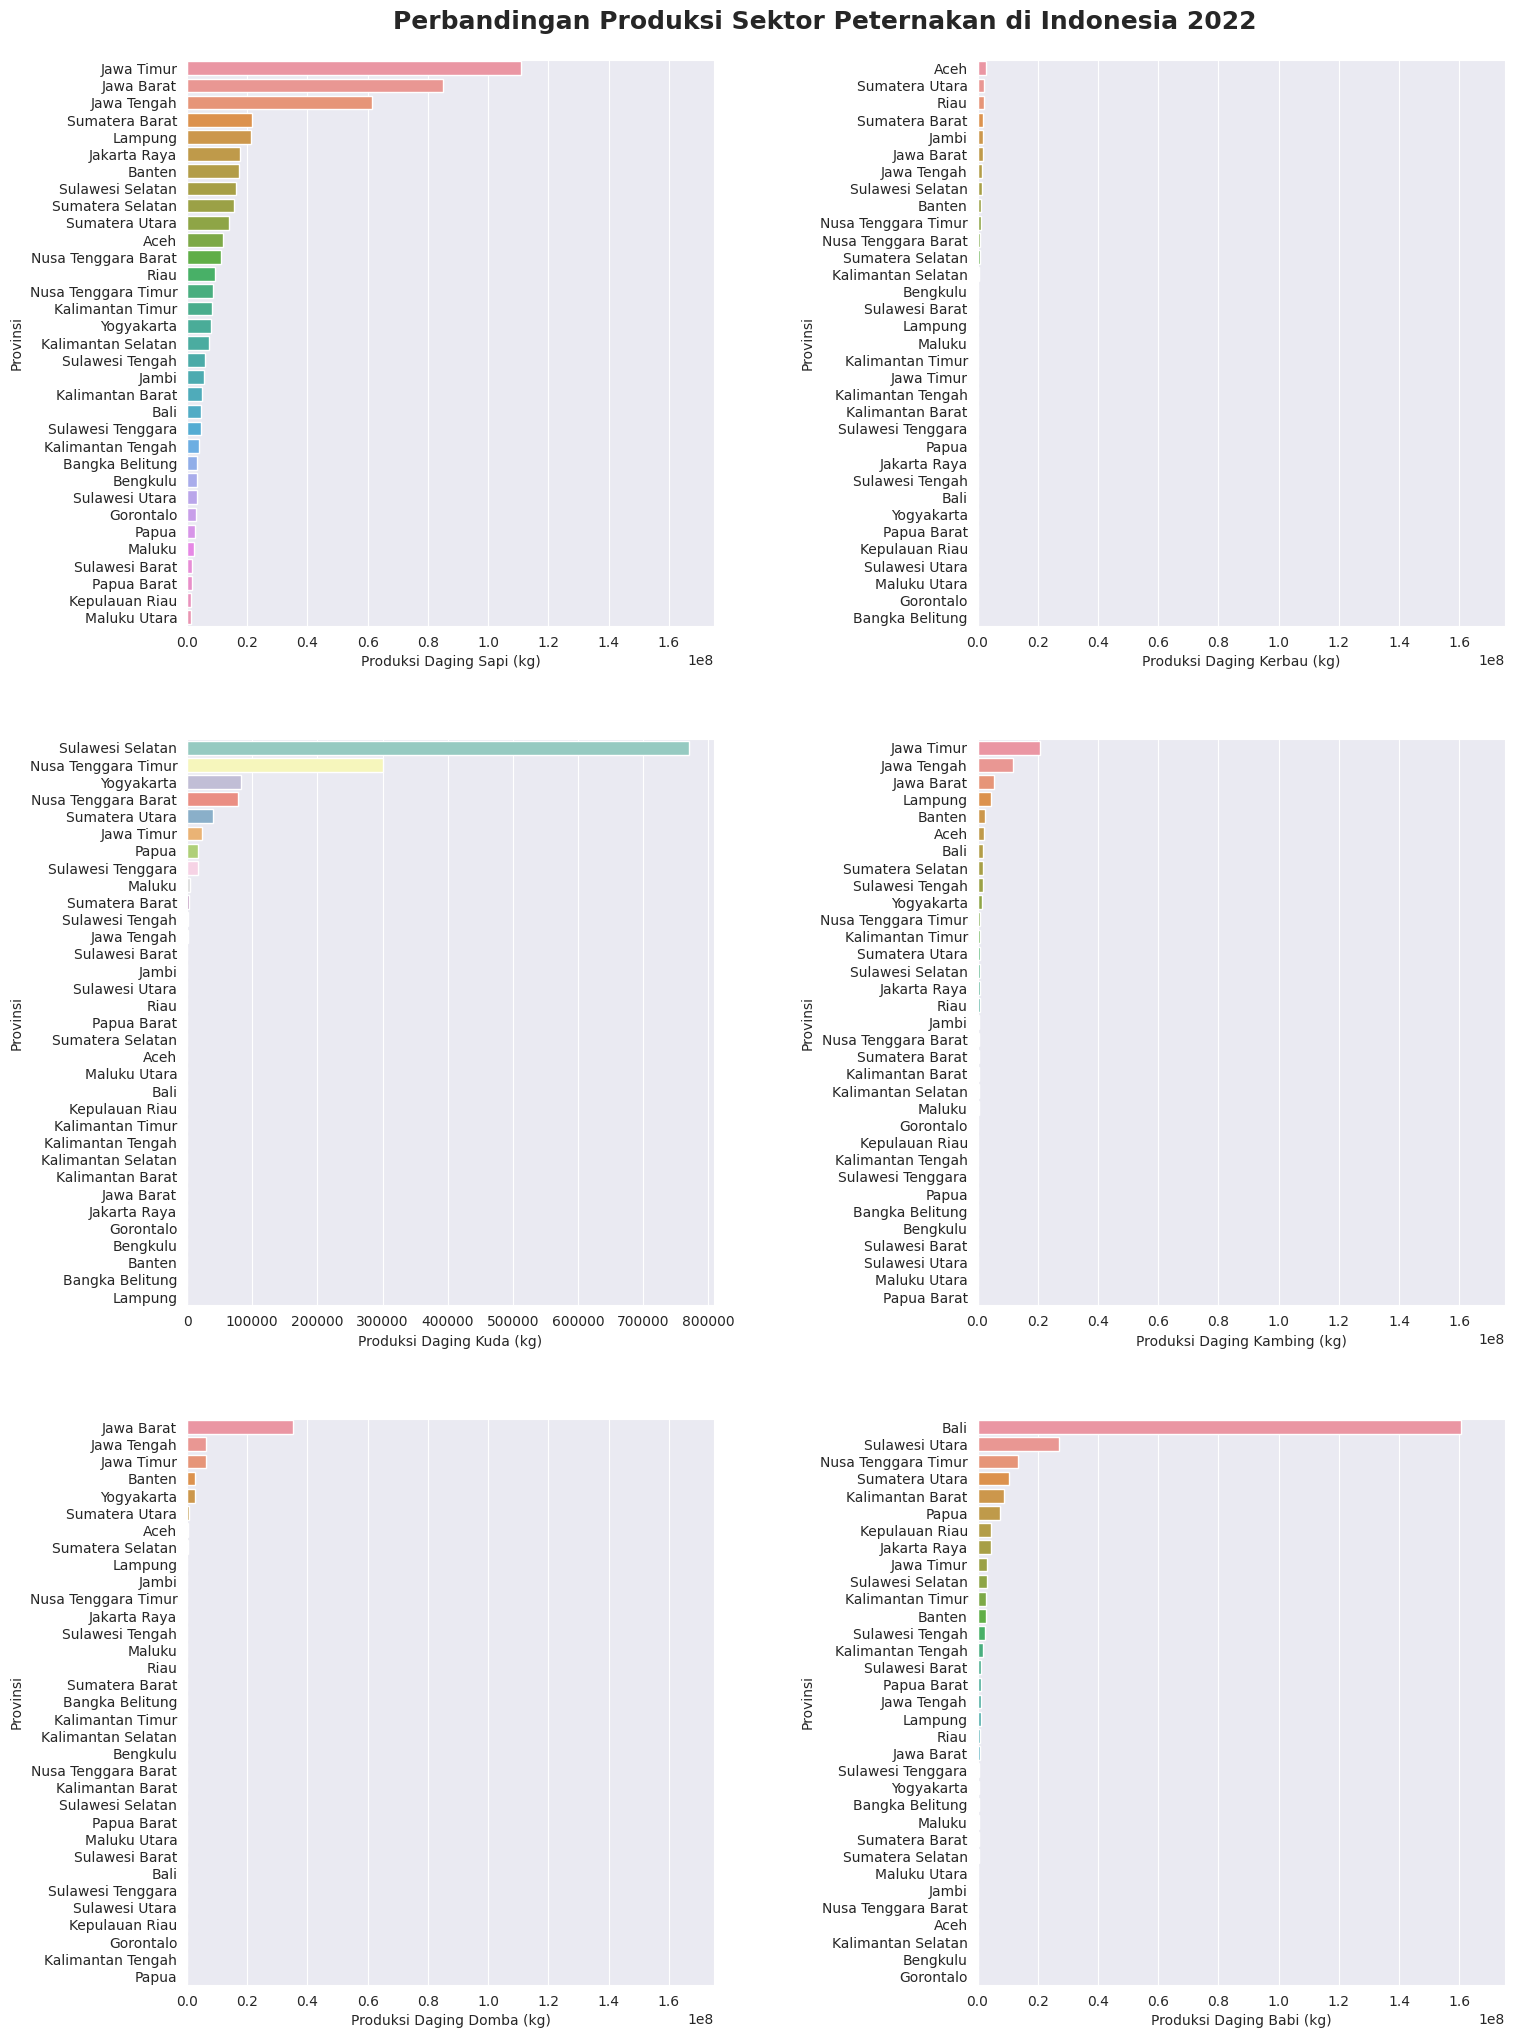

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(17, 25))

for i, col in enumerate(peternakan.columns[1:]):
    if (col != "Produksi Daging Kuda (kg)"):
        sns.barplot(data=produksi_pangan_no_indo.sort_values(by=col, ascending=False), x=col, y="Provinsi", ax=ax[i//2, i%2])
        # Set the axis range
        ax[i//2, i%2].set_xlim(0, 1.75*1e8)
    else: # Kuda cuman dikit
        sns.barplot(data=produksi_pangan_no_indo.sort_values(by=col, ascending=False), x=col, y="Provinsi", ax=ax[i//2, i%2], palette="Set3")

fig.suptitle('Perbandingan Produksi Sektor Peternakan di Indonesia 2022', fontsize=18, y=0.9, fontweight='bold')
plt.subplots_adjust(wspace=0.5)

# **III. Modelling**

#### **Konsumsi Pangan** -- Predicting

In [ ]:
# Modifikasi konsumsi_pangan ke TimeSeries data
ts_cross_validation = temp_konsumsi_pangan.copy()
ts_cross_validation[ts_cross_validation.columns] = ts_cross_validation.loc[:, ts_cross_validation.columns].astype("float")

ts_cross_validation.index = pd.to_datetime(ts_cross_validation.index)
# Set the frequency of the DataFrame to "AS-JAN"
ts_cross_validation = ts_cross_validation.asfreq('AS-JAN')

ts_cross_validation.tail()

Beras lokal/ketan  Jagung basah dengan kulit  \
2018-01-01              1.551                      0.029   
2019-01-01              1.504                      0.039   
2020-01-01              1.505                      0.050   
2021-01-01              1.569                      0.034   
2022-01-01              1.560                      0.032   

            Jagung pocelan/pipilan  Ketela pohon  Ketela rambat  Gaplek  \
2018-01-01                   0.019         0.091          0.060   0.002   
2019-01-01                   0.017         0.084          0.061   0.002   
2020-01-01                   0.015         0.093          0.059   0.002   
2021-01-01                   0.016         0.119          0.071   0.003   
2022-01-01                   0.014         0.106          0.065   0.002   

            Ikan dan udang segar  Ikan dan udang diawetkan  \
2018-01-01                 0.324                    0.0429   
2019-01-01                 0.336                    0.0425   
2020-01-01                 0.333                    0.0414   
2021-01-01                 0.353                    0.0418   
2022-01-01                 0.367                    0.0420   

            Daging sapi/kerbau  Daging ayam ras/kampung  \
2018-01-01               0.009                    0.121   
2019-01-01               0.009                    0.124   
2020-01-01               0.009                    0.130   
2021-01-01               0.009                    0.142   
2022-01-01               0.010                    0.153   

            Telur ayam ras/kampung  Telur itik/manila/asin  Susu kental manis  \
2018-01-01                   2.152                   0.039              0.088   
2019-01-01                   2.137                   0.035              0.072   
2020-01-01                   2.187                   0.032              0.070   
2021-01-01                   2.280                   0.032              0.072   
2022-01-01                   2.336                   0.142              0.071   

            Susu bubuk bayi  Bawang merah  Bawang putih  Cabe merah  \
2018-01-01            0.013        0.0529        0.0330      0.0034   
2019-01-01            0.013        0.0537        0.0346      0.0038   
2020-01-01            0.014        0.0518        0.0320      0.0032   
2021-01-01            0.013        0.0561        0.0359      0.0035   
2022-01-01            0.013        0.0580        0.0387      0.0037   

            Cabe rawit  Kacang kedelai   Tahu  Tempe  \
2018-01-01      0.0035           0.001  0.158  0.146   
2019-01-01      0.0038           0.001  0.152  0.139   
2020-01-01      0.0034           0.001  0.153  0.140   
2021-01-01      0.0037           0.001  0.158  0.146   
2022-01-01      0.0040           0.001  0.148  0.140   

            Minyak kelapa/jagung/goreng lainnya  Kelapa  Gula pasir  \
2018-01-01                                0.227   0.092      0.1309   
2019-01-01                                0.228   0.090      0.1272   
2020-01-01                                0.233   0.087      0.1254   
2021-01-01                                0.253   0.088      0.1281   
2022-01-01                                0.244   0.078      0.1212   

            Gula merah  
2018-01-01      0.0124  
2019-01-01      0.0119  
2020-01-01      0.0122  
2021-01-01      0.0134  
2022-01-01      0.0125

Tuning Order untuk setiap kolom

In [ ]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Filter out the specific warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message="Non-stationary starting autoregressive parameters")
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters")

data = ts_cross_validation.copy()
df_order = {}

# Define the parameter grid for ARIMA order
p_values = range(0, 3)  # example range for p
d_values = range(0, 2)  # example range for d
q_values = range(0, 3)  # example range for q

list_best_rmse = []

for col in data.columns:
  best_rmse = np.inf
  best_order = None
  # Iterate over all parameter combinations
  for p in p_values:
      for d in d_values:
          for q in q_values:
              order = (p, d, q)
              model = ARIMA(data[col], order=order)
              try:
                  # Fit the ARIMA model
                  model_fit = model.fit()

                  # Perform time series cross-validation and calculate RMSE
                  # Split your data into training and testing sets (if needed)
                  train_size = int(len(data[col]) * 0.8)  # example split ratio
                  train, test = data[col][:train_size], data[col][train_size:]

                  # Make predictions on the test set
                  predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

                  # Calculate RMSE
                  rmse = np.sqrt(mean_squared_error(test, predictions))

                  # Update the best RMSE and order if a better result is found
                  if rmse < best_rmse:
                      best_rmse = rmse
                      best_order = order

              except:
                  continue

  # Print the best order and corresponding RMSE
  print(f"Best ARIMA Order in {col}:", best_order)
  print(f"Best RMSE in {col}:", best_rmse)
  print()
  list_best_rmse.append(best_rmse)
  df_order[col] = best_order

print(f"RMSE Menggunakan Order terbaik untuk setiap kolomnya adalah {np.mean(list_best_rmse)}")

Best ARIMA Order in Beras lokal/ketan: (2, 0, 2)
Best RMSE in Beras lokal/ketan: 0.027389641077902118

Best ARIMA Order in Jagung basah dengan kulit: (2, 1, 0)
Best RMSE in Jagung basah dengan kulit: 0.009379664918151938

Best ARIMA Order in Jagung pocelan/pipilan: (1, 1, 2)
Best RMSE in Jagung pocelan/pipilan: 0.0015822394585994022

Best ARIMA Order in Ketela pohon: (0, 0, 2)
Best RMSE in Ketela pohon: 0.010941471015080952

Best ARIMA Order in Ketela rambat: (1, 0, 2)
Best RMSE in Ketela rambat: 0.005727455707567297

Best ARIMA Order in Gaplek: (2, 0, 2)
Best RMSE in Gaplek: 0.0004699635882015232

Best ARIMA Order in Ikan dan udang segar: (2, 1, 1)
Best RMSE in Ikan dan udang segar: 0.009851729116699362

Best ARIMA Order in Ikan dan udang diawetkan: (1, 1, 1)
Best RMSE in Ikan dan udang diawetkan: 0.0005574496084794972

Best ARIMA Order in Daging sapi/kerbau: (0, 1, 0)
Best RMSE in Daging sapi/kerbau: 0.0005000000000000004

Best ARIMA Order in Daging ayam ras/kampung: (2, 1, 1)
Best R

In [ ]:
df_order

{'Beras lokal/ketan': (2, 0, 2),
 'Jagung basah dengan kulit': (2, 1, 0),
 'Jagung pocelan/pipilan': (1, 1, 2),
 'Ketela pohon': (0, 0, 2),
 'Ketela rambat': (1, 0, 2),
 'Gaplek': (2, 0, 2),
 'Ikan dan udang segar': (2, 1, 1),
 'Ikan dan udang diawetkan': (1, 1, 1),
 'Daging sapi/kerbau': (0, 1, 0),
 'Daging ayam ras/kampung': (2, 1, 1),
 'Telur ayam ras/kampung': (1, 1, 1),
 'Telur itik/manila/asin': (1, 0, 2),
 'Susu kental manis': (0, 0, 1),
 'Susu bubuk bayi': (2, 1, 0),
 'Bawang merah': (0, 1, 0),
 'Bawang putih': (2, 1, 0),
 'Cabe merah': (1, 1, 2),
 'Cabe rawit': (0, 1, 1),
 'Kacang kedelai': (0, 1, 0),
 'Tahu': (1, 0, 0),
 'Tempe': (0, 0, 0),
 'Minyak kelapa/jagung/goreng lainnya': (1, 1, 2),
 'Kelapa': (0, 1, 0),
 'Gula pasir': (1, 1, 2),
 'Gula merah': (0, 1, 2)}

In [ ]:
# Modifikasi konsumsi_pangan ke TimeSeries data
ts_konsumsi_pangan = temp_konsumsi_pangan.copy()
ts_konsumsi_pangan[ts_konsumsi_pangan.columns] = ts_konsumsi_pangan.loc[:, ts_konsumsi_pangan.columns].astype("float")

ts_konsumsi_pangan.index = pd.to_datetime(ts_konsumsi_pangan.index)
# Set the frequency of the DataFrame to "AS-JAN"
ts_konsumsi_pangan = ts_konsumsi_pangan.asfreq('AS-JAN')

ts_konsumsi_pangan.tail()

Beras lokal/ketan  Jagung basah dengan kulit  \
2018-01-01              1.551                      0.029   
2019-01-01              1.504                      0.039   
2020-01-01              1.505                      0.050   
2021-01-01              1.569                      0.034   
2022-01-01              1.560                      0.032   

            Jagung pocelan/pipilan  Ketela pohon  Ketela rambat  Gaplek  \
2018-01-01                   0.019         0.091          0.060   0.002   
2019-01-01                   0.017         0.084          0.061   0.002   
2020-01-01                   0.015         0.093          0.059   0.002   
2021-01-01                   0.016         0.119          0.071   0.003   
2022-01-01                   0.014         0.106          0.065   0.002   

            Ikan dan udang segar  Ikan dan udang diawetkan  \
2018-01-01                 0.324                    0.0429   
2019-01-01                 0.336                    0.0425   
2020-01-01                 0.333                    0.0414   
2021-01-01                 0.353                    0.0418   
2022-01-01                 0.367                    0.0420   

            Daging sapi/kerbau  Daging ayam ras/kampung  \
2018-01-01               0.009                    0.121   
2019-01-01               0.009                    0.124   
2020-01-01               0.009                    0.130   
2021-01-01               0.009                    0.142   
2022-01-01               0.010                    0.153   

            Telur ayam ras/kampung  Telur itik/manila/asin  Susu kental manis  \
2018-01-01                   2.152                   0.039              0.088   
2019-01-01                   2.137                   0.035              0.072   
2020-01-01                   2.187                   0.032              0.070   
2021-01-01                   2.280                   0.032              0.072   
2022-01-01                   2.336                   0.142              0.071   

            Susu bubuk bayi  Bawang merah  Bawang putih  Cabe merah  \
2018-01-01            0.013        0.0529        0.0330      0.0034   
2019-01-01            0.013        0.0537        0.0346      0.0038   
2020-01-01            0.014        0.0518        0.0320      0.0032   
2021-01-01            0.013        0.0561        0.0359      0.0035   
2022-01-01            0.013        0.0580        0.0387      0.0037   

            Cabe rawit  Kacang kedelai   Tahu  Tempe  \
2018-01-01      0.0035           0.001  0.158  0.146   
2019-01-01      0.0038           0.001  0.152  0.139   
2020-01-01      0.0034           0.001  0.153  0.140   
2021-01-01      0.0037           0.001  0.158  0.146   
2022-01-01      0.0040           0.001  0.148  0.140   

            Minyak kelapa/jagung/goreng lainnya  Kelapa  Gula pasir  \
2018-01-01                                0.227   0.092      0.1309   
2019-01-01                                0.228   0.090      0.1272   
2020-01-01                                0.233   0.087      0.1254   
2021-01-01                                0.253   0.088      0.1281   
2022-01-01                                0.244   0.078      0.1212   

            Gula merah  
2018-01-01      0.0124  
2019-01-01      0.0119  
2020-01-01      0.0122  
2021-01-01      0.0134  
2022-01-01      0.0125

In [ ]:


df_predictions = pd.DataFrame(
    index=["2023", "2024", "2025", "2026", "2027"],
    columns=ts_konsumsi_pangan.columns
)

for col in ts_konsumsi_pangan.columns:
    count = 0

    # Fit the ARIMA model to the data for each column using best order for each column
    model = ARIMA(ts_konsumsi_pangan[col], order=df_order[col])
    model_fit = model.fit()

    # Predict the values for years ahead
    prediction = model_fit.forecast(steps=len(df_predictions.index))
    for tahun in list(df_predictions.index):
        df_predictions.loc[tahun, col] = prediction[count].round(4)
        count += 1

In [ ]:
# Concatenate the dataframes row-wise
ts_konsumsi_pangan = pd.concat([ts_konsumsi_pangan, df_predictions])
temp_konsumsi_pangan = pd.concat([temp_konsumsi_pangan, df_predictions])

ts_konsumsi_pangan.tail()

Beras lokal/ketan Jagung basah dengan kulit Jagung pocelan/pipilan  \
2023            1.5961                    0.0387                 0.0146   
2024            1.5944                    0.0405                  0.014   
2025            1.6081                    0.0379                 0.0137   
2026            1.6162                    0.0367                 0.0135   
2027            1.6228                    0.0377                 0.0134   

     Ketela pohon Ketela rambat  Gaplek Ikan dan udang segar  \
2023       0.0986        0.0586  0.0024               0.3726   
2024       0.0973        0.0537  0.0024               0.3794   
2025       0.0979        0.0571  0.0024               0.3857   
2026       0.0979        0.0544  0.0024               0.3917   
2027       0.0979        0.0565  0.0024               0.3974   

     Ikan dan udang diawetkan Daging sapi/kerbau Daging ayam ras/kampung  \
2023                   0.0421               0.01                  0.1592   
2024                    0.042               0.01                  0.1637   
2025                   0.0421               0.01                  0.1673   
2026                   0.0421               0.01                  0.1702   
2027                   0.0421               0.01                  0.1726   

     Telur ayam ras/kampung Telur itik/manila/asin Susu kental manis  \
2023                 2.3916                 0.1461            0.0695   
2024                 2.4471                 0.0582            0.0685   
2025                 2.5026                 0.0594            0.0685   
2026                  2.558                 0.0603            0.0685   
2027                 2.6134                 0.0611            0.0685   

     Susu bubuk bayi Bawang merah Bawang putih Cabe merah Cabe rawit  \
2023          0.0135        0.058       0.0363     0.0038      0.004   
2024          0.0132        0.058       0.0368     0.0038      0.004   
2025          0.0131        0.058       0.0371     0.0038      0.004   
2026          0.0134        0.058       0.0368     0.0038      0.004   
2027          0.0132        0.058       0.0369     0.0038      0.004   

     Kacang kedelai    Tahu   Tempe Minyak kelapa/jagung/goreng lainnya  \
2023          0.001  0.1479  0.1399                              0.2455   
2024          0.001  0.1478  0.1399                              0.2456   
2025          0.001  0.1478  0.1399                              0.2456   
2026          0.001  0.1477  0.1399                              0.2457   
2027          0.001  0.1477  0.1399                              0.2457   

     Kelapa Gula pasir Gula merah  
2023  0.078     0.1215     0.0123  
2024  0.078     0.1191     0.0125  
2025  0.078     0.1189     0.0125  
2026  0.078     0.1189     0.0125  
2027  0.078     0.1189     0.0125

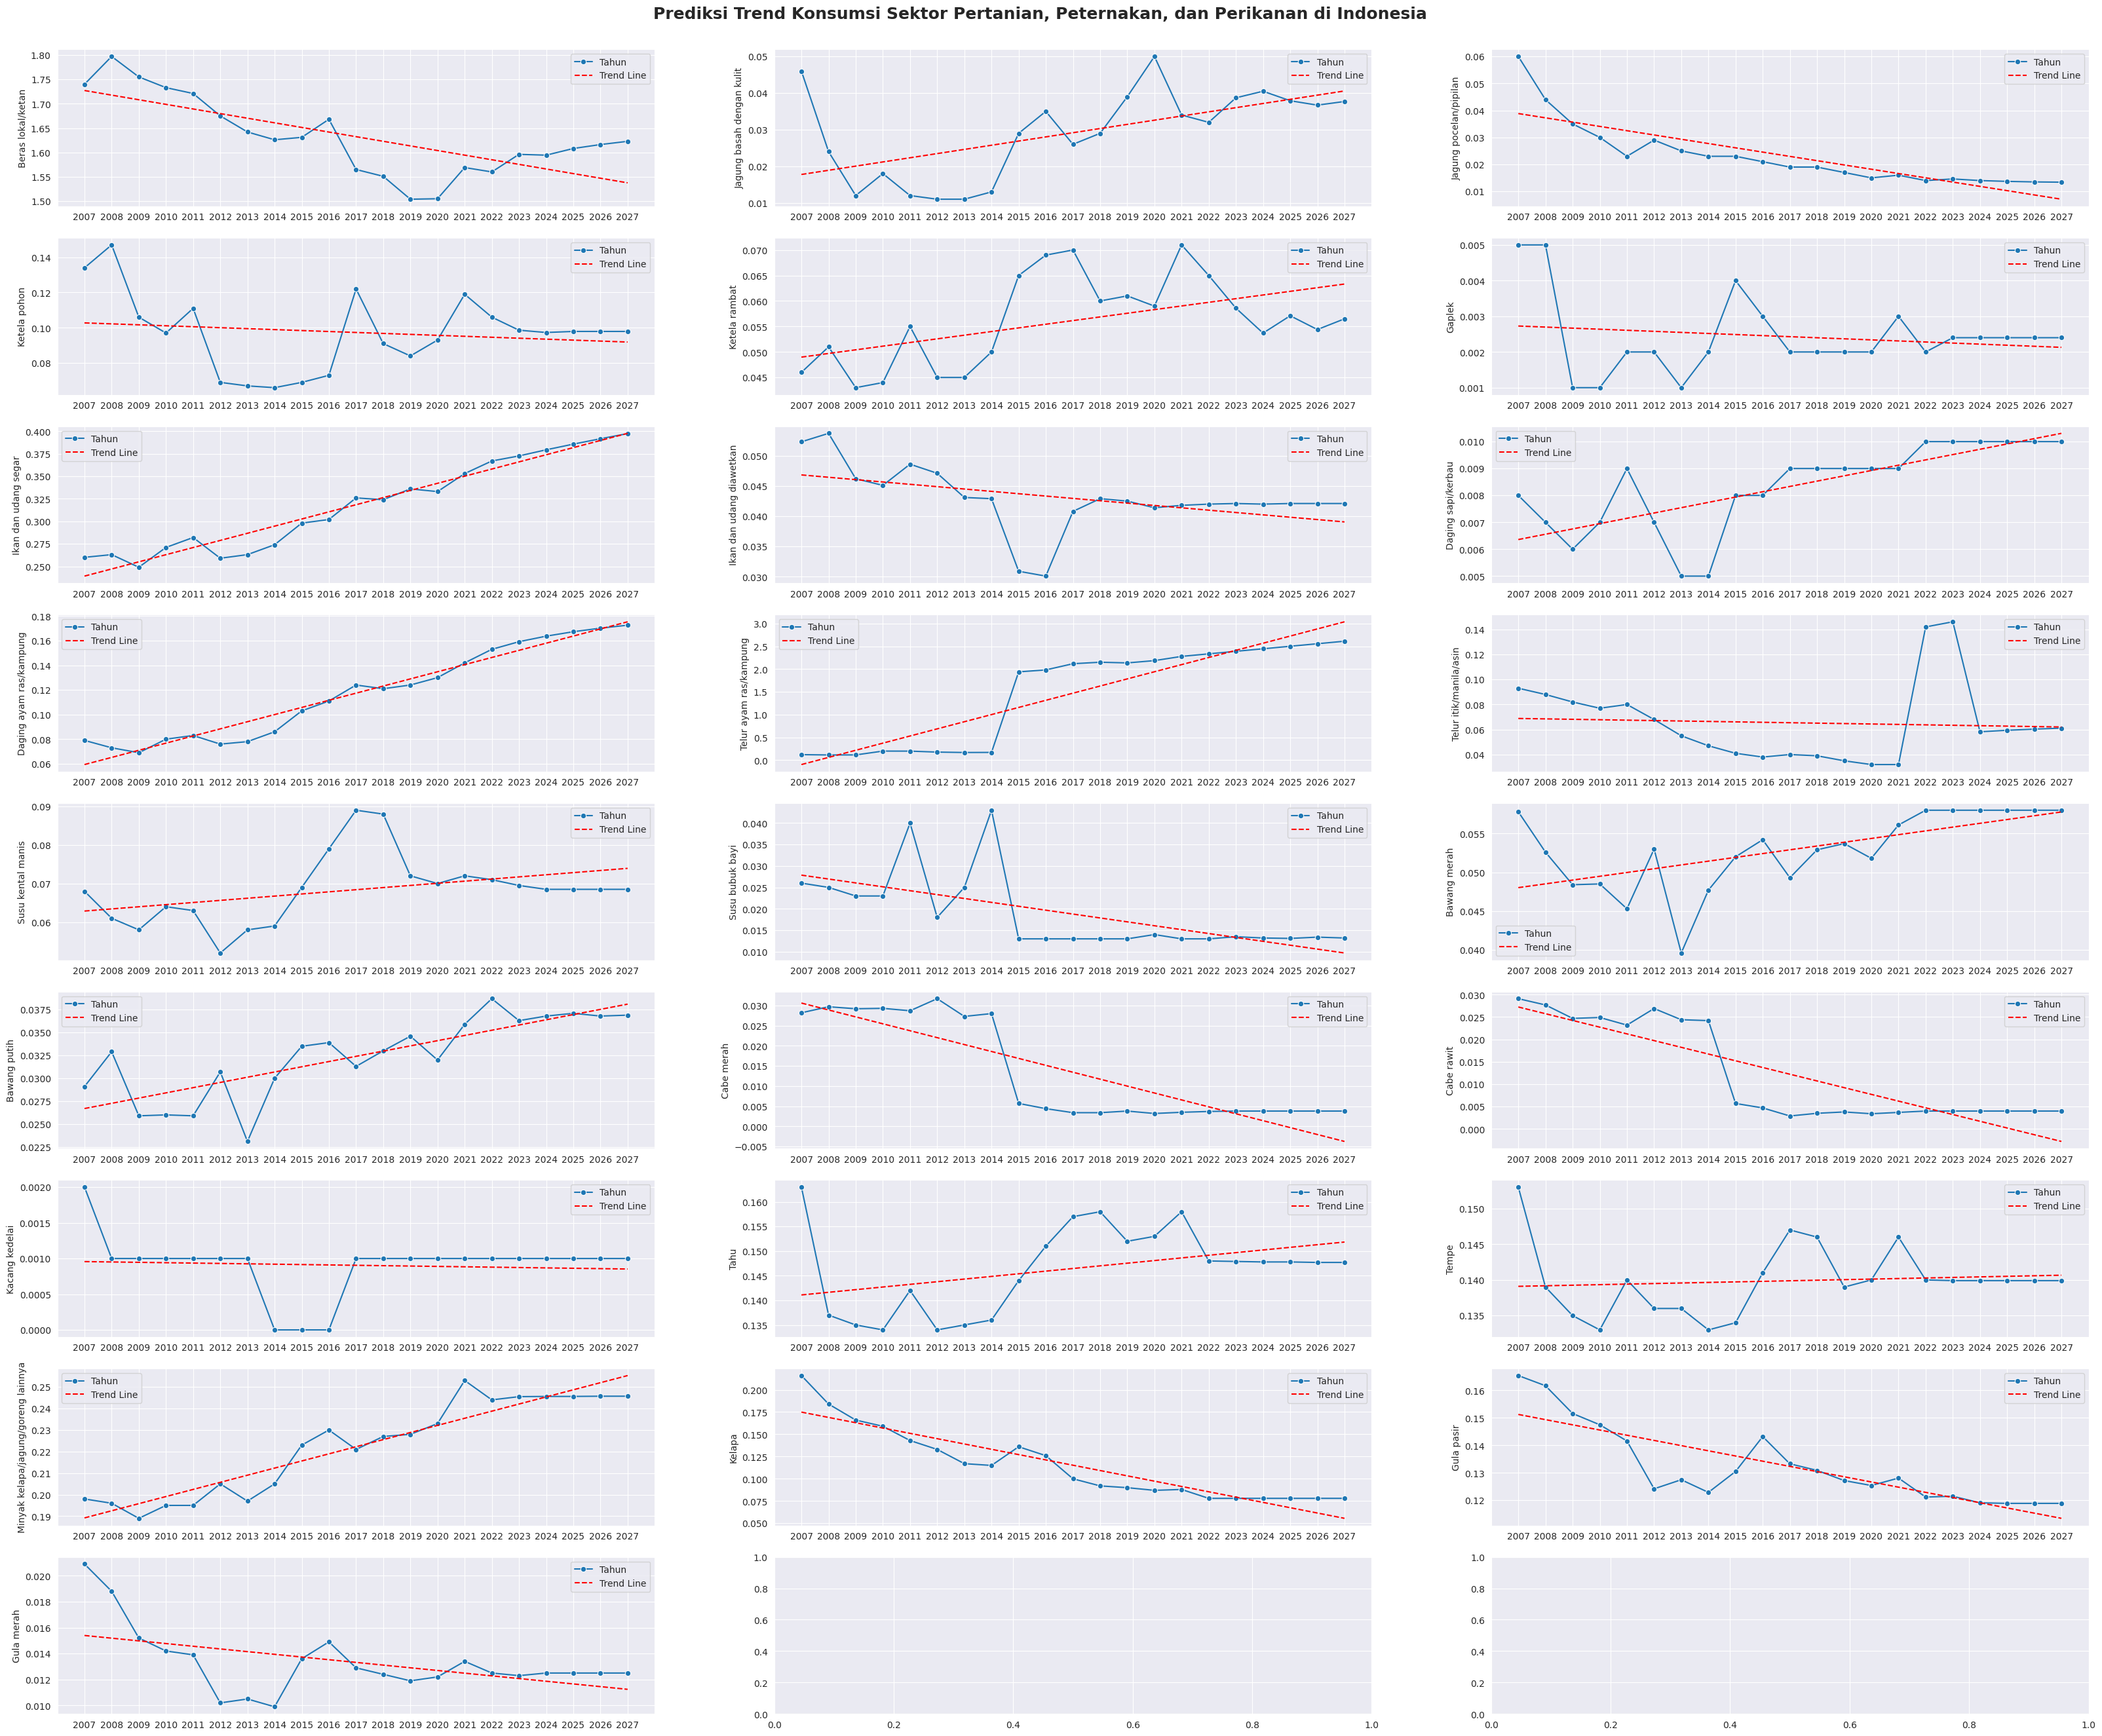

In [ ]:
fig, ax = plt.subplots(nrows=9, ncols=3, figsize=(40, 33))

for i, col in enumerate(temp_konsumsi_pangan.columns):
    sns.lineplot(data=temp_konsumsi_pangan, x=temp_konsumsi_pangan.index, y=col, ax=ax[i//3, i%3], marker="o", label="Tahun")

    # Perform linear regression
    x = np.arange(len(temp_konsumsi_pangan))
    y = temp_konsumsi_pangan[col].astype(float)  # Ensure data is in float64 format
    coefficients = np.polyfit(x, y, 1)
    slope = coefficients[0]
    intercept = coefficients[1]

    # Generate the trend line
    trend_line = slope * x + intercept
    ax[i//3, i%3].plot(x, trend_line, linestyle='--', color='red', label='Trend Line')

    # Add legend
    ax[i//3, i%3].legend()

fig.suptitle('Prediksi Trend Konsumsi Sektor Pertanian, Peternakan, dan Perikanan di Indonesia', fontsize=18, y=0.9, fontweight='bold')
plt.subplots_adjust(hspace=0.2)

plt.show()